<a href="https://colab.research.google.com/github/MinsooKwak/NLP/blob/main/Article_project/%EB%85%BC%EB%AC%B8%EC%9A%94%EC%95%BD%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Summarization Model (가제)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
#!sudo apt-get install -y fonts-nanum  ## 폰트설치
#!sudo fc-cache -fv ## 폰트 업데이트
#!rm ~/.cache/matplotlib -rf ## 캐쉬된 matplotlib 폰트 삭제하여 재로딩

In [ ]:
# 경고를 무시합니다.
import warnings
warnings.filterwarnings("ignore")

# 구글 드라이브 호출
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ttflist에 Nanum 글자 들어가는 폰트 있는지 확인하는 코드
f = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
f

['NanumSquare',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound']

In [ ]:
#폰트종류설정
plt.rcParams["font.family"] ='NanumSquare'

In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.12
설정 폰트 글꼴: ['NanumSquare'], 설정 폰트 사이즈: 10.0


한글 글꼴 설정

In [ ]:
path = '/content/drive/MyDrive/text/NanumSquareR.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumSquare


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.rcParams['axes.unicode_minus']=False
font_path = '/content/drive/MyDrive/text/NanumSquareR.ttf'
fontprop = font_manager.FontProperties(fname=font_path, size=20)

plt.rc('font', family='NanumBarunGothic')

In [ ]:
cd /content/drive/MyDrive/data/Article_summary/Training/training_article

/content/drive/MyDrive/data/Article_summary/Training/training_article


In [ ]:
ls

논문요약_0206_0.json  논문요약_0220_0.json    new_train.csv
논문요약_0206_1.json  논문요약_0225_5_1.json  train_article.csv
논문요약_0206_2.json  논문요약_0225_7_0.json


### train dataset import

In [ ]:
train_df = pd.read_csv('new_train.csv')

print(f'train set의 shape     : {train_df.shape}')
print(f'train dataset의 결측치: {train_df.isna().sum()}\n')
print('-'*40)
train_df.head(3)

train set의 shape     : (122269, 12)
train dataset의 결측치: doc_id              0
title               0
date                0
reg_no              0
ipc                 0
issued_by           0
author              0
entire_original     0
entire_summary      0
summary_original    0
summary_summary     0
doc_type            0
dtype: int64

----------------------------------------


,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
0,A200928004902,몰입(Flow) 이론을 적용한 진로상담모형,2002,ART000850832,사회과학,한국청소년상담복지개발원,김창대1,몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상...,Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다...,이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았다....,이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았고 ...,논문
1,A200928004903,지역사회 청소년 상담기관의 실제와 연계체제 활성화 방안에 관한 현장 연구: 안양지역...,2002,ART000850833,사회과학,한국청소년상담복지개발원,"김계현1 , 김수임2 , 김영혜3",본 연구는 지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접...,지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조사를 통해...,청소년의 정신건강과 복지를 위한 각종 기관의 설립 및 서비스 사업이 활발하게 이루어...,청소년의 정신건강과 복지를 위한 각종 기관의 설립 및 서비스 사업이 활발하게 이루어...,논문
2,A200928005043,아동의 자살 생각에 영향을 미치는 가족 위험요인,2003,ART000851706,사회과학,한국청소년상담복지개발원,"이정윤1 , 허재홍2",본 연구에서는 아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다. ...,아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다.\n집단간 가족특...,이상과 같은 결과들을 토대로 살펴본 본 연구의 의의 및 시사점은 다음과 같다. 우선...,"자살행동의 저연령화에 충격을 받고 있는 시기에, 본 연구는 초등학교 아동들을 대상으...",논문


In [ ]:
cd /content/drive/MyDrive/data/Article_summary/Validation/validation_논문

/content/drive/MyDrive/data/Article_summary/Validation/validation_논문


In [ ]:
ls

논문요약_0224_0.json    AppleGothic.ttf     validation_article.csv
논문요약_0225_6_2.json  new_validation.csv


### validation dataset import

In [ ]:
val_df = pd.read_csv('new_validation.csv')

print(f'validation dataset의 shape : {val_df.shape}')
print(f'validation dataset의 결측치: {val_df.isna().sum()}\n')
print('-'*40)
val_df.head(3)

validation dataset의 shape : (18061, 12)
validation dataset의 결측치: doc_id              0
title               0
date                0
reg_no              0
ipc                 0
issued_by           0
author              0
entire_original     0
entire_summary      0
summary_original    0
summary_summary     0
doc_type            0
dtype: int64

----------------------------------------


,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
0,A201007211374,국내 검사실에서의 대변 검경 검사에 대한 내부정도관리 현황,2018,ART002294415,의약학,대한진단검사의학회,권용준 (제1)|||원은정 (교신)|||기승정 (참여)|||김수현 (참여)|||신명...,배경: 현재 대변검경검사에서는 적절한 정도관리물질이 없어 질관리가 미진한 실정이다....,본 연구에서는 설사변에서 발견되는 장내 기생충 현황과 대변 검경에 있어 활용 가능한...,본 연구의 목적은 국내 임상 검사실에서 대변 검사의 내부정도 관리 현황을 파악하기 ...,본 연구의 목적은 국내 임상 검사실에서 대변 검사의 내부정도 관리 현황을 파악하기 ...,논문
1,A201007211375,Vibrio 임상 분리주의 균종 동정을 위한 dnaJ 및 16S rDNA의 서열 분...,2018,ART002294295,의약학,대한진단검사의학회,최인선 (제1)|||문대수 (참여)|||박 건 (참여)|||강성호 (참여)|||김춘...,배경: Vibrio 종에는 치명적인 패혈증을 일으키는 균종들도 포함되어 있어서 정확...,Vibrio 균종의 정확한 동정을 위해 적절한 분자 진단법의 도입이 필요하기에 본고...,임상에서 분리된 Vibrio 균종의 동정에 16S rDNA 서열 분석법과 dnaJ ...,임상에서 분리된 Vibrio 균종의 동정에 16S rDNA 서열 분석법과 dnaJ ...,논문
2,A201007211376,미세유체역학 혈액점도계 Viscore-300의 분석적 성능 평가 및 참고범위 설정,2018,ART002294283,의약학,대한진단검사의학회,권용준 (제1)|||이준형 (참여)|||문형섭 (참여)|||김혜란 (참여)|||최현...,배경: 전혈 점도는 혈액이 혈관을 통과할 때 발생하는 내부 저항을 의미한다. 이러한...,전혈 점도 측정을 위해 새로 개발된 미세유체역학 혈액점도계 Viscore-300 (...,혈액 점도는 인체의 혈관 내에서 혈액이 흐를 때 발생하는 내부 저항을 의미하며 혈액...,혈액점도는 심혈관계 및 뇌혈관계질환과의 상관성이 밝혀져 왔으며 혈액 점도측정을 통한...,논문


train dataset과 validation dataset 모두에 대하여 결측치가 없는 것을 확인하였습니다.

해당 부분은 [Json파일을_데이터프레임으로_정제하기.ipynb](https://github.com/MinsooKwak/NLP/blob/main/Article_project/Json%ED%8C%8C%EC%9D%BC%EC%9D%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84%EC%9C%BC%EB%A1%9C_%EC%A0%95%EC%A0%9C%ED%95%98%EA%B8%B0.ipynb)에서 확인할 수 있습니다.

### Dataset 결측치에 대한 부분 시각화

train data에 대한 결측치를 시각화합니다.


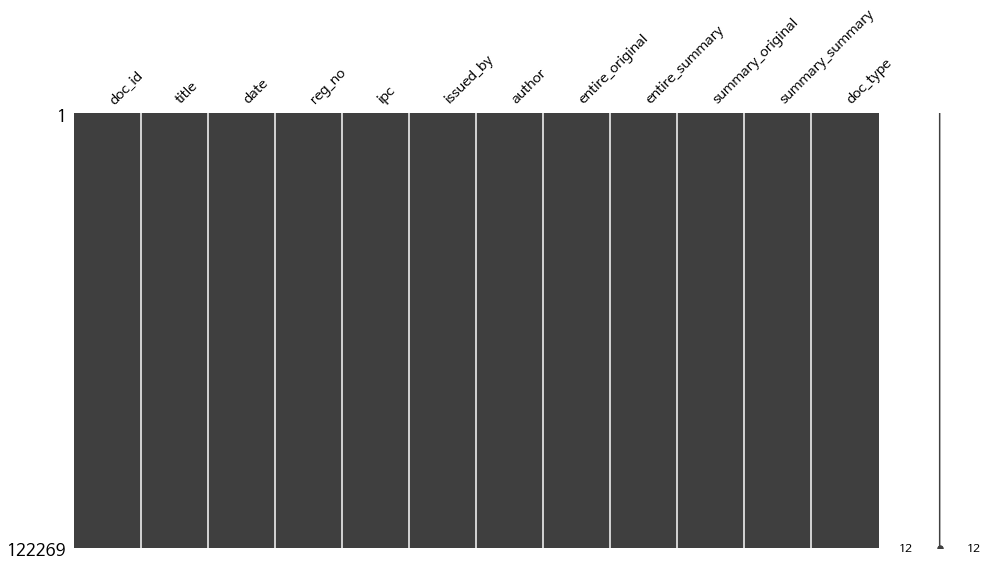

In [ ]:
# 시각화 라이브러리 호출
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


%matplotlib inline
print('train data에 대한 결측치를 시각화합니다.')
msno.matrix(train_df, figsize=(16,8), fontsize=14);

validation dataset에 대한 결측치를 시각화합니다.


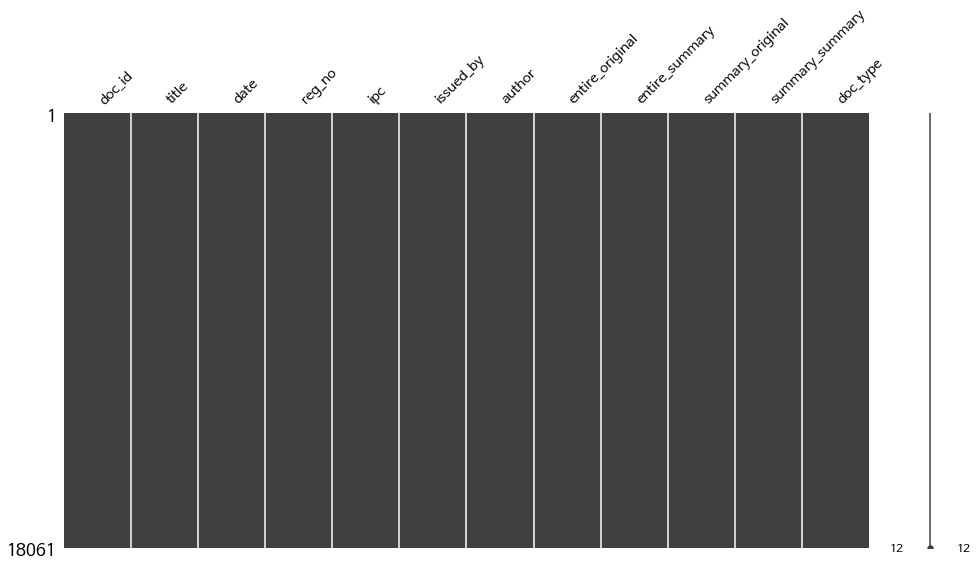

In [ ]:
print('validation dataset에 대한 결측치를 시각화합니다.')
msno.matrix(val_df, figsize=(16,8), fontsize=14);

## 데이터셋 설명

### 데이터셋 설명

- doc_id : 해당 논문의 id
- title: 논문의 제목
- date: 해당 논문이 작성된 연도
- reg_no : 해당 논문 registered number
- issued_by : 해당 논문이 출판된 곳
- author: 논문의 저자(들)
- entire_original, entire_summary
  - entire_original: entire항목의 요약 전 원 텍스트
  - entire_summary: entire_original에 대해 새로 형성된 텍스트
- summary_original, summary_summary
  - summary_original: 횟수기반의 데이터에 의해 형성될 feature들의 원 텍스트
  - summary_summary: summary_original에 대해 횟수와 기존의 단어들을 기반으로 요약된 텍스트
- doc_type : documentation type으로 동일하게 '논문'이라는 값을 포함하고 있다.

----


### 텍스트 요약의 2가지 방법

텍스트 요약에는 2가지 방법이 있다.
- 추출적 요약(extractive summarization) 
- 추상적 요약(abstractive summarization) 


---

**추출적 요약**

'추출'이라는 말에서 드러나듯, 이 방식은 기존에 활용돈 단어들을 기반으로 등장 횟수에 따라 중요도를 판별하고 이를 기반으로 기존의 단어들을 사용하여 요약 텍스트를 형성해주는 방식이다. 원문의 단어들의 사용을 유지하고 싶은 경우 사용할 수 있다.

**추상적 요약**

'추출적 요약'과는 달리 새로운 문장을 형성해주는 방법이다. 사용된 단어의 횟수에 영향을 받지 않고 새로운 문장이 형성되는 방법이다. 이 경우 원 문장에 사용된 단어가 사용되지 않을 수 있다. 이미 존재하는 단어에 한정된 표현이 아니라는 이점이 있지만 원 문장이 본래 의도한 바와 다르게 문장이 형성될 수 있다. 추상적 요약은 지도학습으로 반드시 '레이블'이 필요하다. 레이블에는 기존 문장을 요약해준 새로운 문장이 레이블로 형성되어야 한다.

- 추출적 요약을 진행할 경우 Text-Rank 방식을 사용
- 추상적 요약을 할 경우 Seq2Seq + attention 모델을 사용할 수 있다.

- **이유에 대해 명시해야 함 (추후 명시)**

필자는 추출적 요약이 아닌 추상적 요약 방식을 택하려한다.

추상적 요약의 경우 단어의 한정성이 있으며 중요도에 따라 문장을 구성하기 때문에 전체적 맥락을 고려하지 못할 수 있다 판단하였다.

필자는 Seq2Seq에 attention을 결합한 형식으로 진행하고자 한다.

In [ ]:
train_df.head(2)

,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
0,A200928004902,몰입(Flow) 이론을 적용한 진로상담모형,2002,ART000850832,사회과학,한국청소년상담복지개발원,김창대1,몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상...,Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다...,이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았다....,이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았고 ...,논문
1,A200928004903,지역사회 청소년 상담기관의 실제와 연계체제 활성화 방안에 관한 현장 연구: 안양지역...,2002,ART000850833,사회과학,한국청소년상담복지개발원,"김계현1 , 김수임2 , 김영혜3",본 연구는 지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접...,지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조사를 통해...,청소년의 정신건강과 복지를 위한 각종 기관의 설립 및 서비스 사업이 활발하게 이루어...,청소년의 정신건강과 복지를 위한 각종 기관의 설립 및 서비스 사업이 활발하게 이루어...,논문


새로운 문장을 기반으로 추상적 요약을 진행하기 위해서는 entire feature를 포함한 데이터가 필요하다. 

추후 모델링을 진행할 때 원 텍스트 부분인 entire_summary부분과 이를 새롭게 요약한 entire_summary feature가 필요하다.

In [ ]:
val_df.head(2)

,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
0,A201007211374,국내 검사실에서의 대변 검경 검사에 대한 내부정도관리 현황,2018,ART002294415,의약학,대한진단검사의학회,권용준 (제1)|||원은정 (교신)|||기승정 (참여)|||김수현 (참여)|||신명...,배경: 현재 대변검경검사에서는 적절한 정도관리물질이 없어 질관리가 미진한 실정이다....,본 연구에서는 설사변에서 발견되는 장내 기생충 현황과 대변 검경에 있어 활용 가능한...,본 연구의 목적은 국내 임상 검사실에서 대변 검사의 내부정도 관리 현황을 파악하기 ...,본 연구의 목적은 국내 임상 검사실에서 대변 검사의 내부정도 관리 현황을 파악하기 ...,논문
1,A201007211375,Vibrio 임상 분리주의 균종 동정을 위한 dnaJ 및 16S rDNA의 서열 분...,2018,ART002294295,의약학,대한진단검사의학회,최인선 (제1)|||문대수 (참여)|||박 건 (참여)|||강성호 (참여)|||김춘...,배경: Vibrio 종에는 치명적인 패혈증을 일으키는 균종들도 포함되어 있어서 정확...,Vibrio 균종의 정확한 동정을 위해 적절한 분자 진단법의 도입이 필요하기에 본고...,임상에서 분리된 Vibrio 균종의 동정에 16S rDNA 서열 분석법과 dnaJ ...,임상에서 분리된 Vibrio 균종의 동정에 16S rDNA 서열 분석법과 dnaJ ...,논문


**데이터셋 합치기**

In [ ]:
df = pd.concat([train_df,val_df])
df.shape

(140330, 12)

**인덱스 재배열**

In [ ]:
df.reset_index(drop=True, inplace=True)

## 가설 설정

**가설1.** 데이터셋에 대한 가설: 논문 요약이 주 목적임으로 분야 별로 균형감있게 분포했을 것이다.

**가설2.** 논문에 투입된 저자의 분포가 다를 것이다.

  - 영역 별로 두드러지는 저자가 있을 것이다. (저자의 스타일이 반영될 부분이기 때문이다.)
  - 논문에 투입된 저자의 전체적 분포와 평균의 분포 양상은 다르게 나타날 것이다.
         --> 여기서 얻을 수 있는 인사이트는?

**가설3.** 원문 텍스트 길이와 텍스트 길이 사이에 상관관계가 있을 것이다. 

- 모든 영역 원문 텍스트와 요약 텍스트 길이 사이에 상관관계를 보일 것이다.
- 분야별 원문 텍스트와 요약 텍스트 사이에서도 상관관계를 보일 것이다.
       -->  유사한 상관관계? 어떤 모습을 보이는가?

## 데이터 분석 및 시각화

### **분야별 분포**

먼저 활용된 논문의 종류와 해당 분야의 데이터셋이 얼마나 사용되었는지 확인하겠다.

총 8개의 분야가 존재한다.

In [ ]:
df.ipc.unique()

array(['사회과학', '인문학', '의약학', '농수해양', '예술체육', '공학', '자연과학', '복합학'],
      dtype=object)

(0.0, 65000.0)

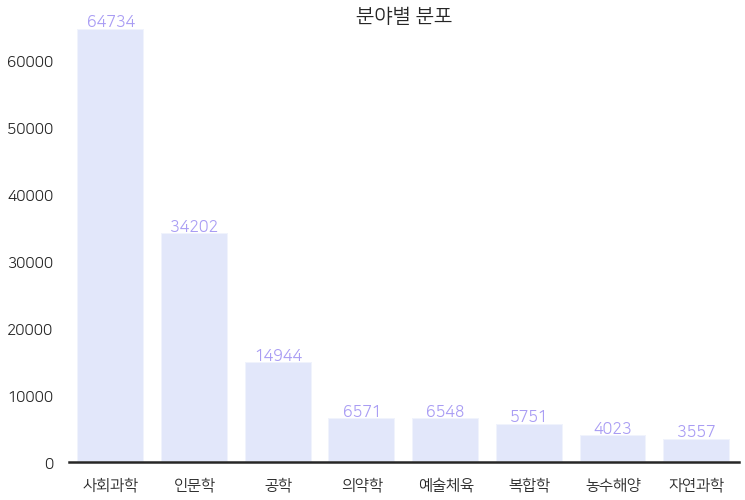

In [ ]:
sns.set_style('white',{'font.family':'NanumSquare'})
sns.set_context("poster", font_scale = 0.7, rc={"grid.linewidth": 5})

fig1= plt.figure(figsize=(12,8))
fig1.gca().spines['right'].set_visible(False)   #오른쪽 테두리 제거
fig1.gca().spines['top'].set_visible(False)     #위 테두리 제거
fig1.gca().spines['left'].set_visible(False)    #왼쪽 테두리 제거
area1= fig1.add_subplot(1,1,1)
area1.set_title('분야별 분포', fontsize=60, fontproperties=fontprop)
ax1= sns.countplot(df.ipc, color='#BECDFF',alpha=0.5, order=df.ipc.value_counts().index, ax=area1)
#ax1.set_xlabel('분야',fontproperties=fontprop, fontsize=15)  # x축 레이블이름
#ax1.set_ylabel('count',fontproperties=fontprop, fontsize=15) # y축 레이블이름
ax1.set(xlabel=None)                            # x 레이블 없게함
ax1.set(ylabel=None)                            # y 레이블 없게 함
# plt.legend(prop=fontprop)                    # legend에서는 prop으로 설정

for p in ax1.patches:
  height= p.get_height()
  ax1.text(p.get_x() + p.get_width() /2., height+380, height, ha='center', size=12, color='#7B68EE', alpha=0.65, fontsize=16)
ax1.set_ylim(0,65000)

In [ ]:
ipc_group = df.groupby(['ipc'])['ipc'].count().sort_values(ascending=False)
ipc_group

ipc
사회과학    64734
인문학     34202
공학      14944
의약학      6571
예술체육     6548
복합학      5751
농수해양     4023
자연과학     3557
Name: ipc, dtype: int64

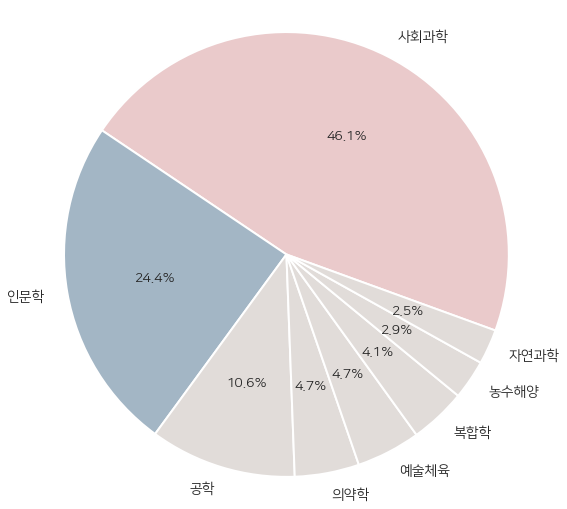

In [ ]:
ipc_group_names = ipc_group.index
ipc_sizes = ipc_group.values
ipc_group_colors=['#EACACB','#A3B6C5', '#E1DCD9','#E1DCD9','#E1DCD9','#E1DCD9','#E1DCD9','#E1DCD9']
ipc_group_explodes= (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
fig2= plt.figure(figsize= (9,9))
plt.pie(ipc_sizes, 
        explode= ipc_group_explodes, 
        labels= ipc_group_names,
        colors= ipc_group_colors,
        autopct='%1.1f%%',
        shadow=False,
        startangle=-20,
        textprops={'fontsize':14})
plt.axis('equal')
plt.show()

**가설1. 분야별 균형감있게 데이터가 구성되었을 것이다(H0)**
- 기각
- 사회과학 영역이 46.1%로 가장 많은양의 데이터를 차지한다.
- 다음으로 인문학 영역이 24.4%를 차지하는데, 두 영역을 합치면 70%를 상회한다.

In [ ]:
###### 추가 확인 필요

**가설에 대한 생각, 의견:**

균형감 있는 데이터셋이 이상적이나, 분류모델을 구축하는 것이 아니기 때문에 큰 영향은 없을 것으로 예상된다. 

구축된 정도에 따라 상대적으로 많은 양의 데이터셋을 보유한 영역이 새로운 텍스트를 형성하는데 영향을 미칠 것으로 예상된다.

**'+'issued by**

In [ ]:
print(f'총 {df.issued_by.nunique()}곳에서 논문이 출판되었다')

총 999곳에서 논문이 출판되었다


### 논문에 투입된 저자의 분포 확인

In [ ]:
ipc_author_df = df[['ipc','author']]
ipc_author_df

,ipc,author
0,사회과학,김창대1
1,사회과학,"김계현1 , 김수임2 , 김영혜3"
2,사회과학,"이정윤1 , 허재홍2"
3,사회과학,차타순1
4,사회과학,"고재흥1 , 지영담2"
...,...,...
140325,인문학,"안외순 /Woe Soon, Ahn"
140326,인문학,염중섭 /Jungseop Youm
140327,인문학,하경숙 /HA KYOUNG-SOOK
140328,인문학,최명환 /Myunghwan Choi


author란에 대하여 전처리와 함께 저자에 대해 나눠주도록하는 함수를 만들어주겠습니다.

In [ ]:
def split_author(str):
  str = str.replace('|||',',')
  str = str.replace('(교신)','')
  str = str.replace('(단독)','')
  return str.split(',')

def len_author(list):
  return len(list)

In [ ]:
# author들을 list로 만들어 저장하고
ipc_author_df['author_list']= ipc_author_df['author'].apply(split_author)

# 해당 논문에 author들이 몇 명 쓰였는지 확인
ipc_author_df['len_author']=ipc_author_df['author_list'].apply(len_author)
ipc_author_df

,ipc,author,author_list,len_author
0,사회과학,김창대1,[김창대1],1
1,사회과학,"김계현1 , 김수임2 , 김영혜3","[김계현1 , 김수임2 , 김영혜3]",3
2,사회과학,"이정윤1 , 허재홍2","[이정윤1 , 허재홍2]",2
3,사회과학,차타순1,[차타순1],1
4,사회과학,"고재흥1 , 지영담2","[고재흥1 , 지영담2]",2
...,...,...,...,...
140325,인문학,"안외순 /Woe Soon, Ahn","[안외순 /Woe Soon, Ahn ]",2
140326,인문학,염중섭 /Jungseop Youm,[염중섭 /Jungseop Youm ],1
140327,인문학,하경숙 /HA KYOUNG-SOOK,[하경숙 /HA KYOUNG-SOOK ],1
140328,인문학,최명환 /Myunghwan Choi,[최명환 /Myunghwan Choi ],1


**논문 분야별 한 논문을 작성할 때 투입된 저자의 수**에 대한 통계입니다.

In [ ]:
ipc_author_df.groupby(['ipc'], as_index=False).mean().round(2).style.background_gradient(axis=None, cmap= sns.light_palette("orange", as_cmap=True))

,ipc,len_author
0,공학,2.400000
1,농수해양,2.540000
2,복합학,1.850000
3,사회과학,1.610000
4,예술체육,1.600000
5,의약학,2.860000
6,인문학,1.300000
7,자연과학,2.440000


[Text(0, 0.5, '')]

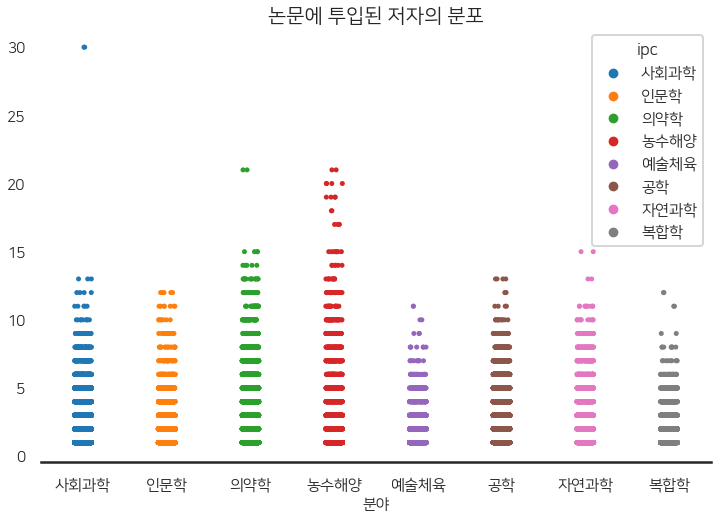

In [ ]:
sns.set_style('white',{'font.family':'NanumSquare'})
fig3= plt.figure(figsize=(12,8))
fig3.gca().spines['right'].set_visible(False)   # 오른쪽 테두리 제거
fig3.gca().spines['top'].set_visible(False)     # 위 테두리 제거
fig3.gca().spines['left'].set_visible(False)    # 왼쪽 테두리 제거
area4= fig3.add_subplot(1,1,1)

area4.set_title('논문에 투입된 저자의 분포', fontsize=60, fontproperties=fontprop)
ax4= sns.stripplot(y = 'len_author', x = 'ipc', data = ipc_author_df, ax=area4, hue='ipc')
ax4.set_xlabel('분야',fontproperties=fontprop, fontsize=15)  # x축 레이블이름
ax4.set(ylabel=None)

In [ ]:
#### 논문에 투입된 저자 분포, 논문에 투자된 저자 평균 분포 비교해봐야함
#### 어떤 인사이트?

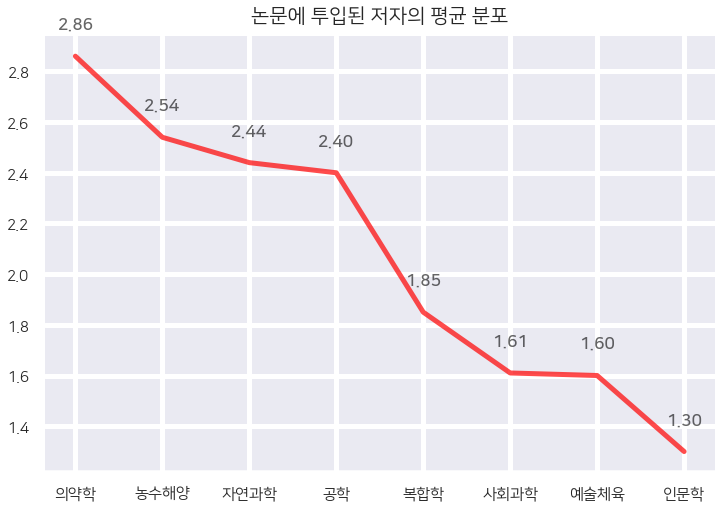

In [ ]:
sns.set_style('darkgrid',{'font.family':'NanumSquare'})
sns.set_context("poster", font_scale = 0.7, rc={"grid.linewidth": 5})

fig4= plt.figure(figsize=(12,8))
fig4.gca().spines['right'].set_visible(False)   # 오른쪽 테두리 제거
fig4.gca().spines['top'].set_visible(False)     # 위 테두리 제거
fig4.gca().spines['left'].set_visible(False)    # 왼쪽 테두리 제거
area5= fig4.add_subplot(1,1,1)

# 수식이 길기 때문에 따로 저장해줌
t = ipc_author_df.groupby(['ipc'],as_index=False).mean().round(2).sort_values(ascending=False, by='len_author')
x_line = t['ipc']
y_line= t['len_author']

area5.set_title('논문에 투입된 저자의 평균 분포', fontsize=60, fontproperties=fontprop, position=(0.5, 1.0+0.02))
ax5 = sns.lineplot(x=x_line, y=y_line, ax=area5, linewidth=5, color='red', alpha=0.7)
ax5.set(xlabel=None)
ax5.set(ylabel=None)

# 그래프에 숫자 표시
for i in range(len(x_line)):
  height= y_line[i]
  plt.text(x_line[i], height+0.09, '%.2f' %height, ha='center', va='bottom', size=17, fontweight='bold', fontdict={'color':'black', 'fontweight':'bold'}, alpha=0.6)

In [ ]:
ipc_author_df2 = ipc_author_df[['ipc','author_list']]
ipc_author_df2

,ipc,author_list
0,사회과학,[김창대1]
1,사회과학,"[김계현1 , 김수임2 , 김영혜3]"
2,사회과학,"[이정윤1 , 허재홍2]"
3,사회과학,[차타순1]
4,사회과학,"[고재흥1 , 지영담2]"
...,...,...
140325,인문학,"[안외순 /Woe Soon, Ahn ]"
140326,인문학,[염중섭 /Jungseop Youm ]
140327,인문학,[하경숙 /HA KYOUNG-SOOK ]
140328,인문학,[최명환 /Myunghwan Choi ]


저자들을 ipc 영역별로 모두 합쳐줍니다.

In [ ]:
df2 = ipc_author_df2.groupby('ipc',as_index=False).sum()
df2

,ipc,author_list
0,공학,"[한명식 (제1)1 , 조국환 /Kook-Hwan Cho 2, 곽창원 /Chang..."
1,농수해양,"[이준호 1 , 윤영길 2, 염동걸1 , 정다워2 , 김건우3 , 박범진4,..."
2,복합학,"[이종문 /Jong-Moon Lee 1, 김다은 /Daeun Kim (제1)1 , ..."
3,사회과학,"[김창대1, 김계현1 , 김수임2 , 김영혜3, 이정윤1 , 허재홍2, 차타순..."
4,예술체육,"[신원정 /Wonjung Shin 1, 신정훈 /Chunghoon Shin 1, 안..."
5,의약학,"[김정숙 /Kim Jeong Sook 1 , 석한빛 2 , 김선주 /Sunjoo..."
6,인문학,"[권상철1, 남영우1 , 이인용2, 김원경1 , 이미영2, 최재헌1 , 김원경..."
7,자연과학,"[제갈소영 /Eunsung Jekal (제1)1 , 홍순철 /Hong Soon C..."


In [ ]:
print(f'공학 부문의 저자는 총 {len(set(df2.author_list[0]))}명 입니다.')

공학 부문의 저자는 총 19192명 입니다.


**저자의 중복을 세는 함수를 정의**합니다.

- 한 번에 처리하기 위해 함수를 정의합니다.

- 중복의 횟수는 영향력의 크기라 할 수 있습니다.

In [ ]:
def define_author(list):
  count={}
  for i in list:
    try: count[i] += 1
    except: count[i]=1
  return count

일괄 처리를 해줍니다.

In [ ]:
author_공학 = define_author(df2.author_list[0])
author_공학 = pd.DataFrame.from_dict(author_공학, orient='index').rename(columns={0:'논문수'})
print(f'공학     영역의 저자에 따른 논문 df shape: {author_공학.shape}\n')

author_농수해양 = define_author(df2.author_list[1])
author_농수해양 = pd.DataFrame.from_dict(author_농수해양, orient='index').rename(columns={0:'논문수'})
print(f'농수해양 영역의 저자에 따른 논문 df shape: {author_농수해양.shape}\n')

author_복합학 = define_author(df2.author_list[2])
author_복합학 = pd.DataFrame.from_dict(author_복합학, orient='index').rename(columns={0:'논문수'})
print(f'복합학   영역의 저자에 따른 논문 df shape: {author_복합학.shape}\n')

author_사회과학 = define_author(df2.author_list[3])
author_사회과학 = pd.DataFrame.from_dict(author_사회과학, orient='index').rename(columns={0:'논문수'})
print(f'사회과학 영역의 저자에 따른 논문 df shape: {author_사회과학.shape}\n')

author_예술체육 = define_author(df2.author_list[4])
author_예술체육 = pd.DataFrame.from_dict(author_예술체육, orient='index').rename(columns={0:'논문수'})
print(f'예술체육 영역의 저자에 따른 논문 df shape: {author_예술체육.shape}\n')

author_의약학 = define_author(df2.author_list[5])
author_의약학 = pd.DataFrame.from_dict(author_의약학, orient='index').rename(columns={0:'논문수'})
print(f'의약학   영역의 저자에 따른 논문 df shape: {author_의약학.shape}\n')

author_인문학 = define_author(df2.author_list[6])
author_인문학 = pd.DataFrame.from_dict(author_인문학, orient='index').rename(columns={0:'논문수'})
print(f'인문학   영역의 저자에 따른 논문 df shape: {author_인문학.shape}\n')

author_자연과학 = define_author(df2.author_list[7])
author_자연과학 = pd.DataFrame.from_dict(author_자연과학, orient='index').rename(columns={0:'논문수'})
print(f'자연과학 영역의 저자에 따른 논문 df shape: {author_자연과학.shape}\n')

공학     영역의 저자에 따른 논문 df shape: (19192, 1)

농수해양 영역의 저자에 따른 논문 df shape: (4571, 1)

복합학   영역의 저자에 따른 논문 df shape: (6609, 1)

사회과학 영역의 저자에 따른 논문 df shape: (51708, 1)

예술체육 영역의 저자에 따른 논문 df shape: (5691, 1)

의약학   영역의 저자에 따른 논문 df shape: (8375, 1)

인문학   영역의 저자에 따른 논문 df shape: (19301, 1)

자연과학 영역의 저자에 따른 논문 df shape: (3994, 1)



In [ ]:
# 자연로그 소수점 변환 (2째 자리까지)
pd.options.display.float_format = '{:.2f}'.format

### **분야별 Top5 영향력 있는 저자 추출**

- 필자가 전처리를 하며 값이 없는 부분에 대해 NOne을 추가해주었으므로 이 부분은 제거하도록 한다. (0번 행이었음)

In [ ]:
author_공학= author_공학.sort_values(by='논문수',ascending=False)
author_공학 = author_공학.iloc[2:]        # NOne, None 제거
공학_top5 = author_공학.iloc[0:5]         # 농수해양 top5

author_농수해양= author_농수해양.sort_values(by='논문수',ascending=False)
author_농수해양 = author_농수해양.iloc[2:]  # NOne, None제거
농수해양_top5= author_농수해양.iloc[0:5]    # 농수해양 top5

author_복합학= author_복합학.sort_values(by='논문수',ascending=False)
author_복합학 = author_복합학.iloc[2:]      # NOne, None제거
복합학_top5= author_복합학.iloc[0:5]        # 복합학 top5

author_사회과학= author_사회과학.sort_values(by='논문수',ascending=False)
author_사회과학 = author_사회과학.iloc[3:]  # NOne제거, None, 공백 제거
사회과학_top5= author_사회과학.iloc[0:5]    # 사회과학 top5

author_예술체육= author_예술체육.sort_values(by='논문수',ascending=False)
author_예술체육 = author_예술체육.iloc[2:]  #NOne, None제거
예술체육_top5= author_예술체육.iloc[0:5]    # 예술체육 top5

author_의약학= author_의약학.sort_values(by='논문수',ascending=False)
author_의약학 = author_의약학.iloc[2:]      # NOne, None제거
의약학_top5= author_의약학.iloc[0:5]        # 의약학 top5

author_인문학= author_인문학.sort_values(by='논문수',ascending=False)
author_인문학 = author_인문학.iloc[2:]      # NOne, None제거
인문학_top5= author_인문학.iloc[0:5]        # 인문학 top5

author_자연과학= author_자연과학.sort_values(by='논문수',ascending=False)
author_자연과학 = author_자연과학.iloc[2:]  # NOne, None제거
자연과학_top5= author_자연과학.iloc[0:5]    # 자연과학 top5

Text(0.5, 1.0, '자연과학 top5')

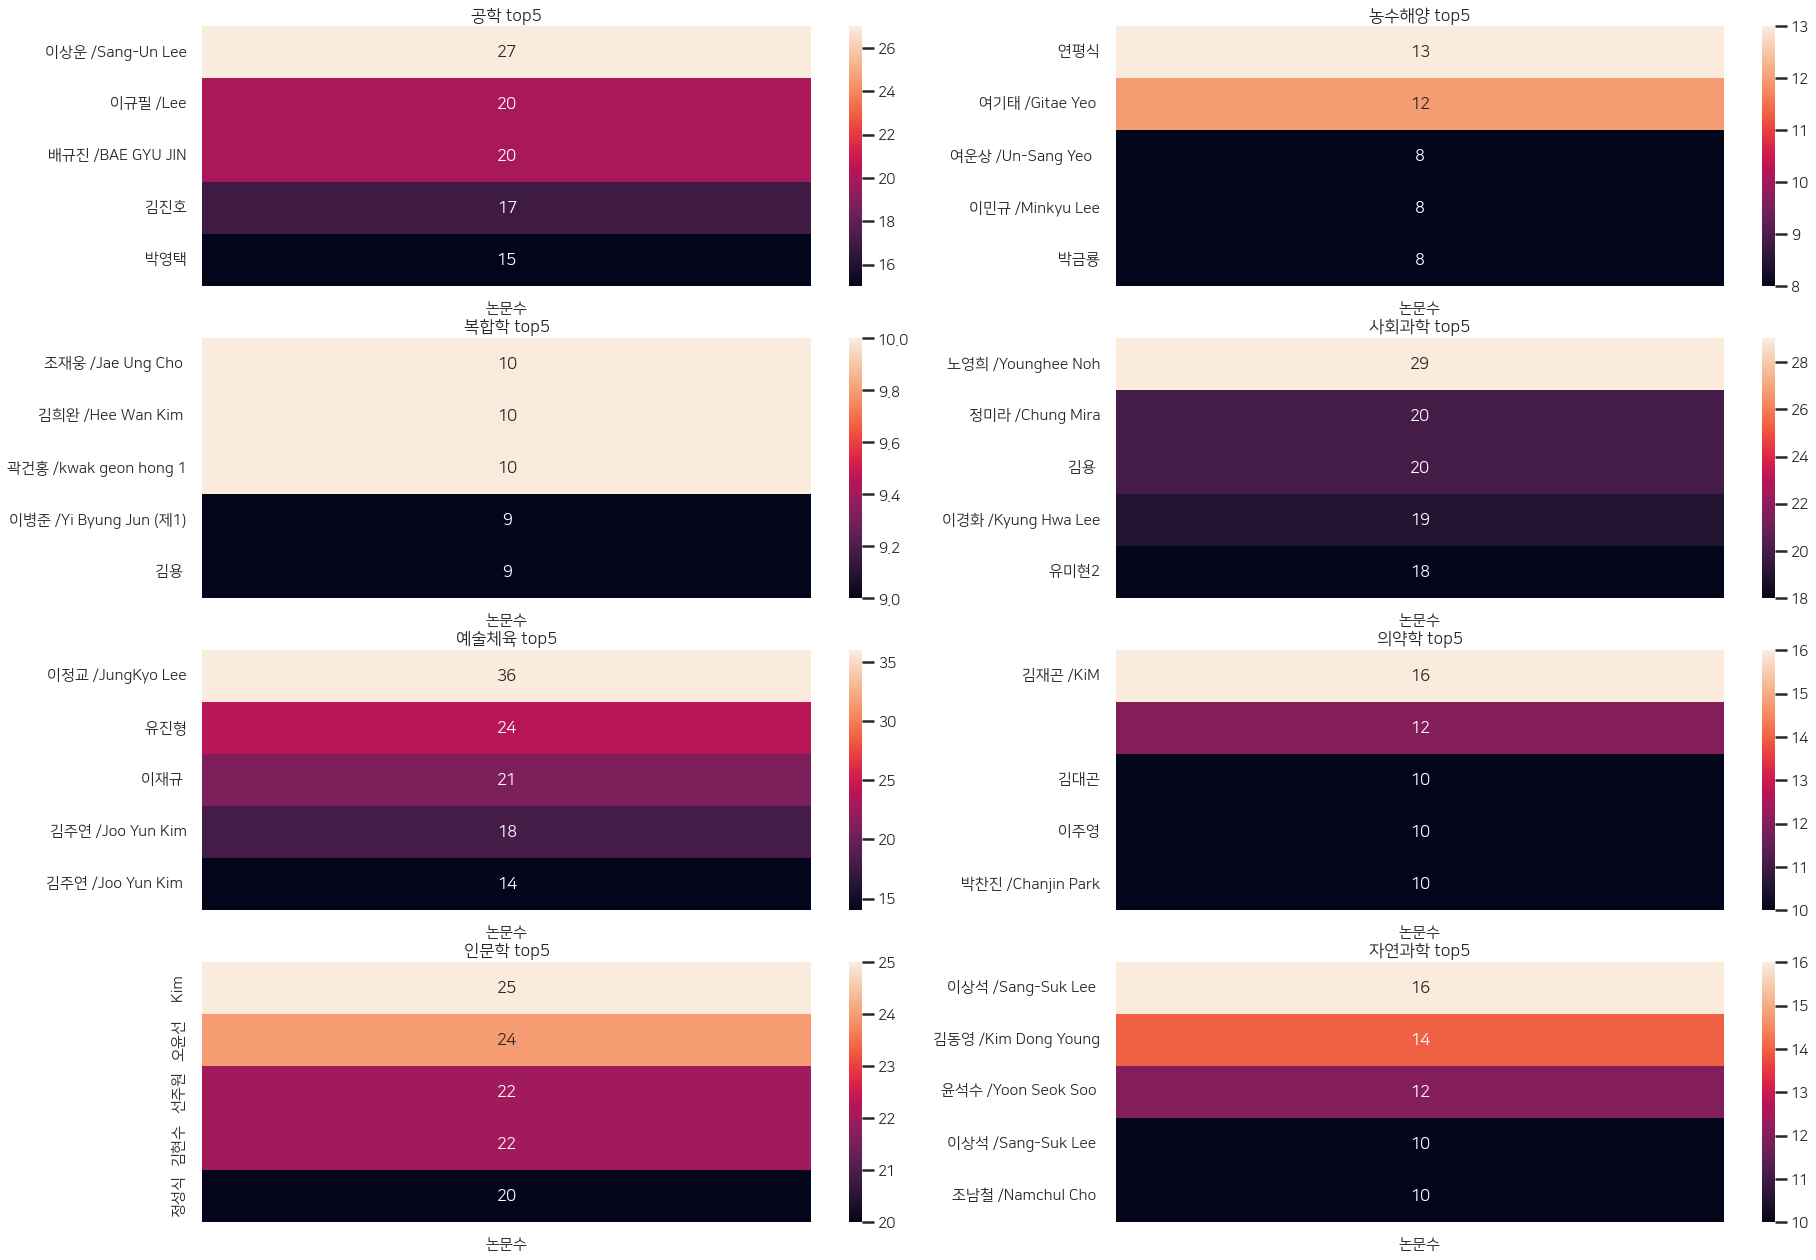

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(30,22))

ax6 = sns.heatmap(공학_top5, annot=True, ax=axes[0,0], fmt='g') # fmt='g' 자연로그 제외
ax6.set_title('공학 top5')

ax7 = sns.heatmap(농수해양_top5, annot=True, ax=axes[0,1], fmt='g')
ax7.set_title('농수해양 top5')

ax8 = sns.heatmap(복합학_top5, annot=True, ax=axes[1,0], fmt='g')
ax8.set_title('복합학 top5')

ax9 = sns.heatmap(사회과학_top5, annot=True, ax=axes[1,1], fmt='g')
ax9.set_title('사회과학 top5')

ax10 = sns.heatmap(예술체육_top5, annot=True, ax=axes[2,0], fmt='g')
ax10.set_title('예술체육 top5')

ax11 = sns.heatmap(의약학_top5, annot=True, ax=axes[2,1], fmt='g')
ax11.set_title('의약학 top5')

ax12 = sns.heatmap(인문학_top5, annot=True, ax=axes[3,0], fmt='g')
ax12.set_title('인문학 top5')

ax13 = sns.heatmap(자연과학_top5, annot=True, ax=axes[3,1], fmt='g')
ax13.set_title('자연과학 top5')

## 모델링을 위한 데이터셋 준비 및 파악

### 활용 데이터셋 추출

In [ ]:
df.head()

,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
0,A200928004902,몰입(Flow) 이론을 적용한 진로상담모형,2002,ART000850832,사회과학,한국청소년상담복지개발원,김창대1,몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상...,Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다...,이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았다....,이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았고 ...,논문
1,A200928004903,지역사회 청소년 상담기관의 실제와 연계체제 활성화 방안에 관한 현장 연구: 안양지역...,2002,ART000850833,사회과학,한국청소년상담복지개발원,"김계현1 , 김수임2 , 김영혜3",본 연구는 지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접...,지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조사를 통해...,청소년의 정신건강과 복지를 위한 각종 기관의 설립 및 서비스 사업이 활발하게 이루어...,청소년의 정신건강과 복지를 위한 각종 기관의 설립 및 서비스 사업이 활발하게 이루어...,논문
2,A200928005043,아동의 자살 생각에 영향을 미치는 가족 위험요인,2003,ART000851706,사회과학,한국청소년상담복지개발원,"이정윤1 , 허재홍2",본 연구에서는 아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다. ...,아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다.\n집단간 가족특...,이상과 같은 결과들을 토대로 살펴본 본 연구의 의의 및 시사점은 다음과 같다. 우선...,"자살행동의 저연령화에 충격을 받고 있는 시기에, 본 연구는 초등학교 아동들을 대상으...",논문
3,A200928004904,자기애적 성격성향과 청소년 비행성향간의 관계,2002,ART000851793,사회과학,한국청소년상담복지개발원,차타순1,"현대사회는 자기애적 현상이 문화적 흐름으로 강하게 자리잡고 있고, 우리나라에도 이 ...","자기애적 성격성향과 청소년 비행성향 간의 관계를 알아보고, 청소년 비행성향에 영향을...",본 연구는 자기애적 성격성향과 비행성향에 대하여 알아보고자 하였다. 본 연구에서 다...,자기애적 성격성향과 비행성향에 대하여 알아보고자 하였고 이런 구성개념은 자기애와 청...,논문
4,A200928004905,청소년의 음란물 접촉과 잘못된 강간통념 수용간의 매개변인과 조정변인의 역할,2002,ART000851794,사회과학,한국청소년상담복지개발원,"고재흥1 , 지영담2","본 연구에서는 청소년들의 음란물 접촉은 날로 증가하지만, 이를 효과적으로 차단하기 ...",청소년들의 음란물 접촉은 날로 증가하지만 이를 효과적으로 차단하기 힘든 현 상황에서...,대부분의 음란물은 성폭력(sexual violence)을 담고 있다. 음란물에서 나...,음란물에서 나타나는 전형적인 성폭력 상황은 여성이 처음에는 남성의 공격에 강하게 저...,논문


추상적 요약 모델을 만들 것이기 때문에 entire_original과 entire_summary 부분이 필요합니다.

이를 새로운 데이터프레임으로 구성해주겠습니다.

In [ ]:
train_data = df[['entire_original','entire_summary','ipc']]
train_data

,entire_original,entire_summary,ipc
0,몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상...,Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다...,사회과학
1,본 연구는 지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접...,지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조사를 통해...,사회과학
2,본 연구에서는 아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다. ...,아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다.\n집단간 가족특...,사회과학
3,"현대사회는 자기애적 현상이 문화적 흐름으로 강하게 자리잡고 있고, 우리나라에도 이 ...","자기애적 성격성향과 청소년 비행성향 간의 관계를 알아보고, 청소년 비행성향에 영향을...",사회과학
4,"본 연구에서는 청소년들의 음란물 접촉은 날로 증가하지만, 이를 효과적으로 차단하기 ...",청소년들의 음란물 접촉은 날로 증가하지만 이를 효과적으로 차단하기 힘든 현 상황에서...,사회과학
...,...,...,...
140325,현존하는 最古/最高의 한국 역사서 『三國史記』와 『三國遺事』에 대해 대립적으로 이해...,현존하는 最古/最高의 한국 역사서 『三國史記』와 『三國遺事』에 대해 대립적으로 이해...,인문학
140326,"功夫選은 親政을 선언해서 辛旽과 거리를 두게 된 恭愍王이, 불교계의 개편의지를 가지...","功夫選은 親政을 선언해서 辛旽과 거리를 두게 된 恭愍王이, 불교계의 개편의지를 가지...",인문학
140327,김부용(金芙蓉)은 조선시대의 여류 문인이다. 호는 운초(雲楚)이고 정조 때 평남 성...,김부용(金芙蓉)은 조선시대의 여류 문인이다. 인물에 대한 올바른 시선을 두지 않았던...,인문학
140328,"강(江)의 흐름은 시간과 공간을 초월하며, 강과 강 주변에 다양한 문화현상들을 형성...",본 논문에서는 홍천강 인근지역에 전승하는 ‘이괄설화’를 대상으로 했다. 이괄은 조선...,인문학


데이터셋에 대한 중복 확인 (재확인)

In [ ]:
print('Original  Text에서 중복을 배제한 샘플의 수: ', train_data['entire_original'].nunique())
print('Summary한 Text에서 중복을 배제한 샘플의 수: ', train_data['entire_summary'].nunique())

Original  Text에서 중복을 배제한 샘플의 수:  92050
Summary한 Text에서 중복을 배제한 샘플의 수:  92037


Original Text에서와 Summary Text에서 중복을 배제한 샘플의 수가 다르게 나타났습니다.

Summary에서 중복된 부분이 더 많이 나온 것은 Original Text가 다르더라도 전체 문맥을 고려한 새로운 문장이 같을 수 있기 때문입니다.

따라서 entire_original을 기준으로 중복처리를 하겠습니다.

In [ ]:
train_data.drop_duplicates(subset=['entire_original'], inplace=True)  
print(f'전체 샘플의 수는 {len(train_data)}입니다.')
print(f'결측치가 있는 샘프의 수는 {train_data.isna().sum()}입니다.')

전체 샘플의 수는 92050입니다.
결측치가 있는 샘프의 수는 entire_original    0
entire_summary     0
ipc                0
dtype: int64입니다.


### 데이터셋 대한 파악

In [ ]:
def find_len(str):
  return(len(str))

In [ ]:
train_data2 = train_data[['entire_original','entire_summary']]
train_data2['original_len'] = train_data2['entire_original'].apply(find_len)
train_data2['summary_len']= train_data2['entire_summary'].apply(find_len)

In [ ]:
train_data2

,entire_original,entire_summary,original_len,summary_len
0,몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상...,Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다...,1050,184
1,본 연구는 지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접...,지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조사를 통해...,725,209
2,본 연구에서는 아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다. ...,아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다.\n집단간 가족특...,912,168
3,"현대사회는 자기애적 현상이 문화적 흐름으로 강하게 자리잡고 있고, 우리나라에도 이 ...","자기애적 성격성향과 청소년 비행성향 간의 관계를 알아보고, 청소년 비행성향에 영향을...",801,200
4,"본 연구에서는 청소년들의 음란물 접촉은 날로 증가하지만, 이를 효과적으로 차단하기 ...",청소년들의 음란물 접촉은 날로 증가하지만 이를 효과적으로 차단하기 힘든 현 상황에서...,1010,219
...,...,...,...,...
134066,일제 강점기 재만 조선인문학은 흔히 말하듯 절대다수가 건전한 작품으로 되여 있다. ...,일제강점기 재만 조선인문학 작품의 일부는 만주국정권에 영합하거나 일제의 대륙침략에 ...,938,215
134067,본고의 목적은 수능을 통해 국어교육을 되돌아보고 이를 발판으로 삼아 국어교육에 대해...,수능 평가 목표로 볼 때 국어교육의 과제는 범교과적 성격을 유지하고 내용 교과로서의...,703,160
134068,본 연구에서는 단위학교에서의 국어교육 정책 실행 양상을 살펴 그 이면에 놓인 철학을...,"단위학교의 정의적 영역 평가 실태를 분석한 결과, 정책 실행 과정에서 해당 정책의 ...",672,145
134069,국어교육에서는 구조주의 의미론의 입장에서 의미는 고정되어 있고 핵심 개념이 존재한다...,국어교육의 구조주의 의미론과는 다르게 실제 언어생활에서 의미는 맥락과 상황이 작용하...,561,125


In [ ]:
print('\n원문에 대한 분석은 다음과 같습니다.')
print(f'원문 길이는 최소 {min(train_data2.original_len)}, 최대 {max(train_data2.original_len)}입니다.')
print(f'원문 길이의 평균은 {round(train_data2.original_len.mean(),2)}입니다.\n')
print('-'*40)
print('요약문에 대한 분석은 다음과 같습니다.')
print(f'요약문의 길이는 최소 {min(train_data2.summary_len)}, 최대 {max(train_data2.summary_len)}입니다.')
print(f'요약문 길이의 평균은 {round(train_data2.summary_len.mean())}입니다. \n')


원문에 대한 분석은 다음과 같습니다.
원문 길이는 최소 26, 최대 5599입니다.
원문 길이의 평균은 832.9입니다.

----------------------------------------
요약문에 대한 분석은 다음과 같습니다.
요약문의 길이는 최소 5, 최대 1292입니다.
요약문 길이의 평균은 146입니다. 



**원문 텍스트와 요약 텍스트의 상관관계 분석**

In [ ]:
train_data2.original_len.corr(train_data2.summary_len)

0.6764419998284324

In [ ]:
print(f'0.7 기준을 강한 상관관계가 있다 판단을 한다면, 원 텍스트와 요약 텍스트는 {round(train_data2.original_len.corr(train_data2.summary_len),2)}으로 비교적 강한 상관관계를 갖습니다.')

0.7 기준을 강한 상관관계가 있다 판단을 한다면, 원 텍스트와 요약 텍스트는 0.68으로 비교적 강한 상관관계를 갖습니다.


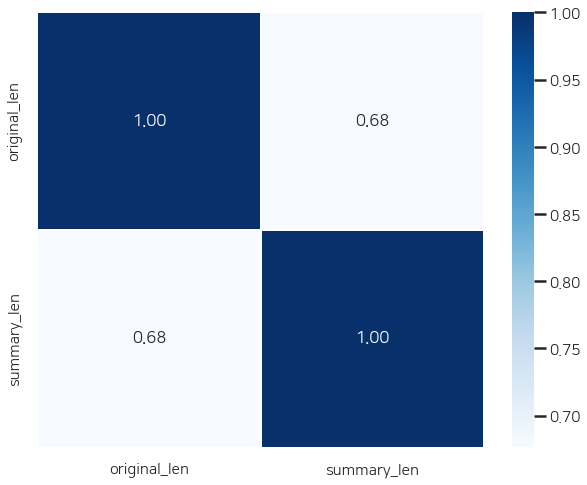

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = train_data2.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

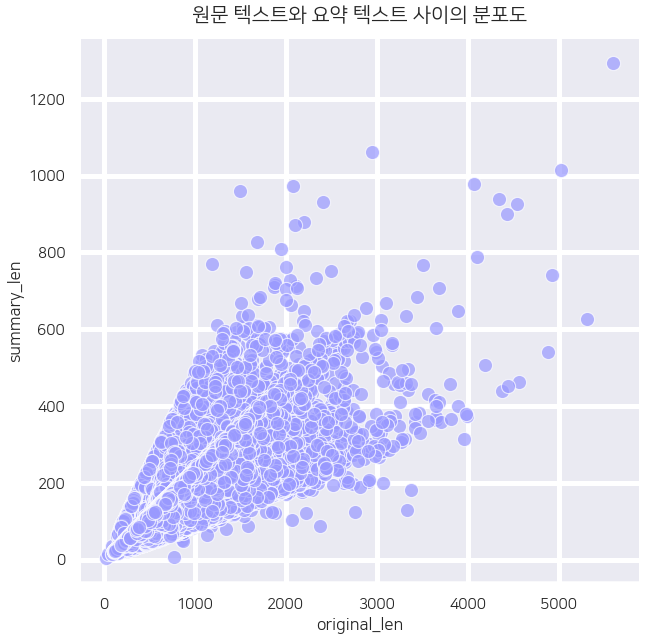

In [ ]:
sns.set_style('darkgrid',{'font.family':'NanumSquare'})

fig14= plt.figure(figsize=(10,10))
fig14.gca().spines['right'].set_visible(False)   # 오른쪽 테두리 제거
fig14.gca().spines['top'].set_visible(False)     # 위 테두리 제거
fig14.gca().spines['left'].set_visible(False)    # 왼쪽 테두리 제거
area14= fig14.add_subplot(1,1,1)

area14.set_title('원문 텍스트와 요약 텍스트 사이의 분포도', fontsize=60, fontproperties=fontprop, position=(0.5, 1.0+0.02))
ax14 = sns.scatterplot(x="original_len", y="summary_len", data=train_data2, alpha=0.7, ax=area14, color='#9999FF', s=200)

- 원문 텍스트와 요약 텍스트 사이의 분포를 확인해보면, 원문과 요약 텍스트의 길이가 양의 상관관계를 갖고 있음을 볼 수 있다. 

[Text(0, 0.5, '')]

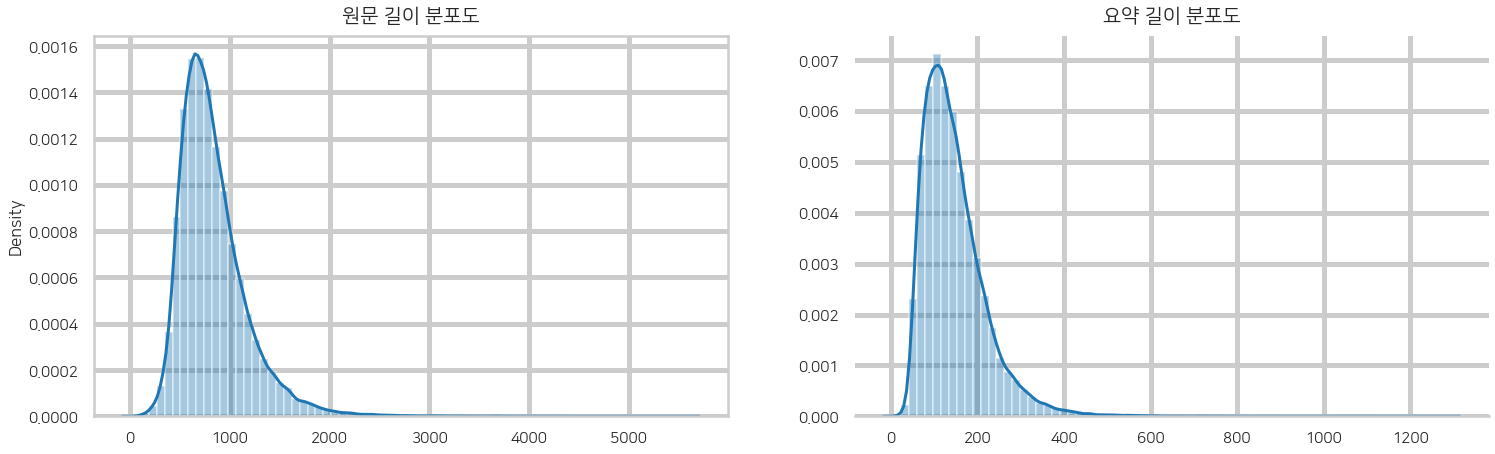

In [ ]:
sns.set_style('whitegrid',{'font.family':'NanumSquare'})

fig15, axes = plt.subplots(1,2,figsize=(25,7))
fig15.gca().spines['right'].set_visible(False)   # 오른쪽 테두리 제거
fig15.gca().spines['top'].set_visible(False)     # 위 테두리 제거
fig15.gca().spines['left'].set_visible(False)    # 왼쪽 테두리 제거

ax15 = sns.distplot(train_data2.original_len, bins=70, ax=axes[0])
ax15.set_title('원문 길이 분포도', fontsize=100, fontproperties=fontprop, position=(0.5, 1.0+0.02))
ax15.set(xlabel=None)
ax15.set(ylabel=None)

ax16 = sns.distplot(train_data2.summary_len, bins=70, ax=axes[1])
ax16.set_title('요약 길이 분포도', fontsize=100, fontproperties=fontprop, position=(0.5, 1+0.02))
ax16.set(xlabel=None)
ax16.set(ylabel=None)

- 원문 길이는 보통 700 ~ 1000의 길이를 갖고 있고, 요약의 경우 70~150 정도의 길이를 갖고 있는 것으로 판단된다.

- **처음 넣어준 원문의 길이와 요약의 길이가 추후 원문을 넣어주고 생성 텍스트를 형성하는데 영향이 있을 것**이라 가정한다.

- 보통 데이터가 정규분포 형태를 띄는 것이 좋으므로 원문의 길이를 맞춰 주는 것이 좋을 것이다. 

  따라서 원문길이 3000 이상의 데이터를 확인하고, 요약 길이 570 이상의 데이터를 확인해보도록 하겠다. 

In [ ]:
# 조건1. 원문의 길이가 3000 이상인 데이터
condition1 = (train_data2.original_len > 3000)
# 조건2. 요약의 길이가 570 이상인 데이터
condition2 = (train_data2.summary_len > 570)

In [ ]:
print('\n원문 길이 3000 이상인 데이터셋 개수: ',len(train_data2[condition1]))
print('요약 길이 570  이상인 데이터셋 개수: ',len(train_data2[condition2]))
print('원문 길이 3000 이상, 요약 길이 570 이상인 데이터셋 개수: ', len(train_data2[condition1&condition2]))

print('-'*70)
print('두 조건을 만족하는 데이터셋은 \n')
print('원문 3000 이상에서', round((len(train_data2[condition1&condition2])/len(train_data2[condition1]))*100,2), '%를 차지합니다.')
print('요약 579  이상에서', round((len(train_data2[condition1&condition2])/len(train_data2[condition2]))*100,2), '%를 차지합니다.')

print('-'*70)
print(f'총 데이터셋 길이에서 원문 3000 이상인 조건에 부합하는 것은 {round((len(train_data2[condition1])/len(train_data2)*100),2)} % 입니다')
print(f'총 데이터셋 길이에서 요약 길이 570 이상인 것은 {round((len(train_data2[condition2])/len(train_data2)*100),2)} % 입니다.')


원문 길이 3000 이상인 데이터셋 개수:  81
요약 길이 570  이상인 데이터셋 개수:  90
원문 길이 3000 이상, 요약 길이 570 이상인 데이터셋 개수:  18
----------------------------------------------------------------------
두 조건을 만족하는 데이터셋은 

원문 3000 이상에서 22.22 %를 차지합니다.
요약 579  이상에서 20.0 %를 차지합니다.
----------------------------------------------------------------------
총 데이터셋 길이에서 원문 3000 이상인 조건에 부합하는 것은 0.09 % 입니다
총 데이터셋 길이에서 요약 길이 570 이상인 것은 0.1 % 입니다.


- 원문 길이 3000 이상, 요약 길이 570 이상인 데이터셋은 제거해주도록하겠습니다.
- 원문 길이 3000 이상인 조건에 부합하는 데이터셋 역시 0.09%를 차지하므로 함께 제거하겠습니다.
- 요약 길이 570 이상인 데이터셋 역시 0.1%를 차지하므로 제거하겠습니다.

모델링에 사용하기 때문에 train_data에만 적용을 해도 되지만, 명확한 파악을 위해 모두 적용시키겠습니다.

### 모델링 활용 데이터 분포 정규화

In [ ]:
# train_data2에서 조건을 만족하는 행을 제거합니다.
train_data2.drop(train_data2[condition1].index, inplace=True)
train_data2.drop(train_data2[condition2].index, inplace=True)

In [ ]:
train_data['original_len']= train_data['entire_original'].apply(find_len)
train_data['summary_len']=train_data['entire_summary'].apply(find_len)

In [ ]:
print(train_data.shape)

(92050, 5)


In [ ]:
# train_data에 대해 조건 변경
condition1 = (train_data.original_len > 3000) # 조건1. 원문의 길이가 3000 이상인 데이터
condition2 = (train_data.summary_len > 570)   # 조건2. 요약의 길이가 570 이상인 데이터

# train_data에서 조건을 만족하는 행을 제거합니다. 
train_data.drop(train_data[condition1].index, inplace=True)
train_data.drop(train_data[condition2].index, inplace=True)

In [ ]:
train_data.shape

(91897, 5)

[Text(0, 0.5, '')]

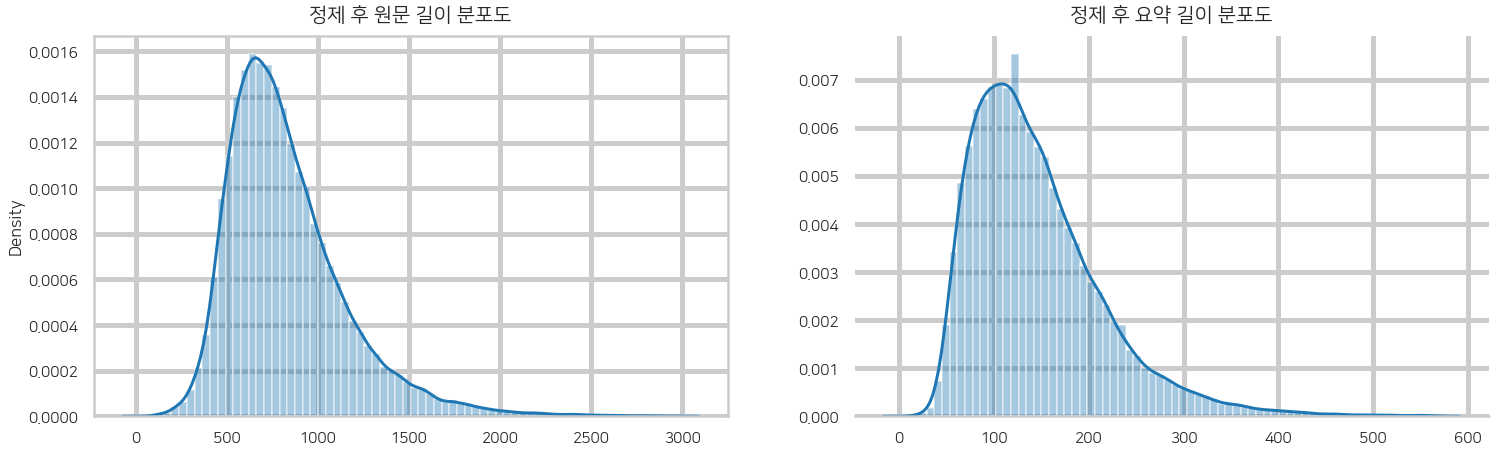

In [ ]:
sns.set_style('whitegrid',{'font.family':'NanumSquare'})

fig17, axes = plt.subplots(1,2,figsize=(25,7))
fig17.gca().spines['right'].set_visible(False)   # 오른쪽 테두리 제거
fig17.gca().spines['top'].set_visible(False)     # 위 테두리 제거
fig17.gca().spines['left'].set_visible(False)    # 왼쪽 테두리 제거

ax17 = sns.distplot(train_data2.original_len, bins=70, ax=axes[0])
ax17.set_title('정제 후 원문 길이 분포도', fontsize=100, fontproperties=fontprop, position=(0.5, 1.0+0.02))
ax17.set(xlabel=None)
ax7.set(ylabel=None)

ax18 = sns.distplot(train_data2.summary_len, bins=70, ax=axes[1])
ax18.set_title('정제 후 요약 길이 분포도', fontsize=100, fontproperties=fontprop, position=(0.5, 1+0.02))
ax18.set(xlabel=None)
ax18.set(ylabel=None)

데이터셋의 분포가 달라진 것을 확인할 수 있습니다.

In [ ]:
print(train_data.shape)
print(train_data2.shape)

(91897, 5)
(91897, 4)


+가설 확인

가설: ipc 분야별로 원문 텍스트와 요약 텍스트의 상관관계가 있다.

In [ ]:
train_data.head()

,entire_original,entire_summary,ipc,original_len,summary_len
0,몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상...,Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다...,사회과학,1050,184
1,본 연구는 지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접...,지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조사를 통해...,사회과학,725,209
2,본 연구에서는 아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다. ...,아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다.\n집단간 가족특...,사회과학,912,168
3,"현대사회는 자기애적 현상이 문화적 흐름으로 강하게 자리잡고 있고, 우리나라에도 이 ...","자기애적 성격성향과 청소년 비행성향 간의 관계를 알아보고, 청소년 비행성향에 영향을...",사회과학,801,200
4,"본 연구에서는 청소년들의 음란물 접촉은 날로 증가하지만, 이를 효과적으로 차단하기 ...",청소년들의 음란물 접촉은 날로 증가하지만 이를 효과적으로 차단하기 힘든 현 상황에서...,사회과학,1010,219


Text(0.5, 1.01, '복합학 분야 분포도')

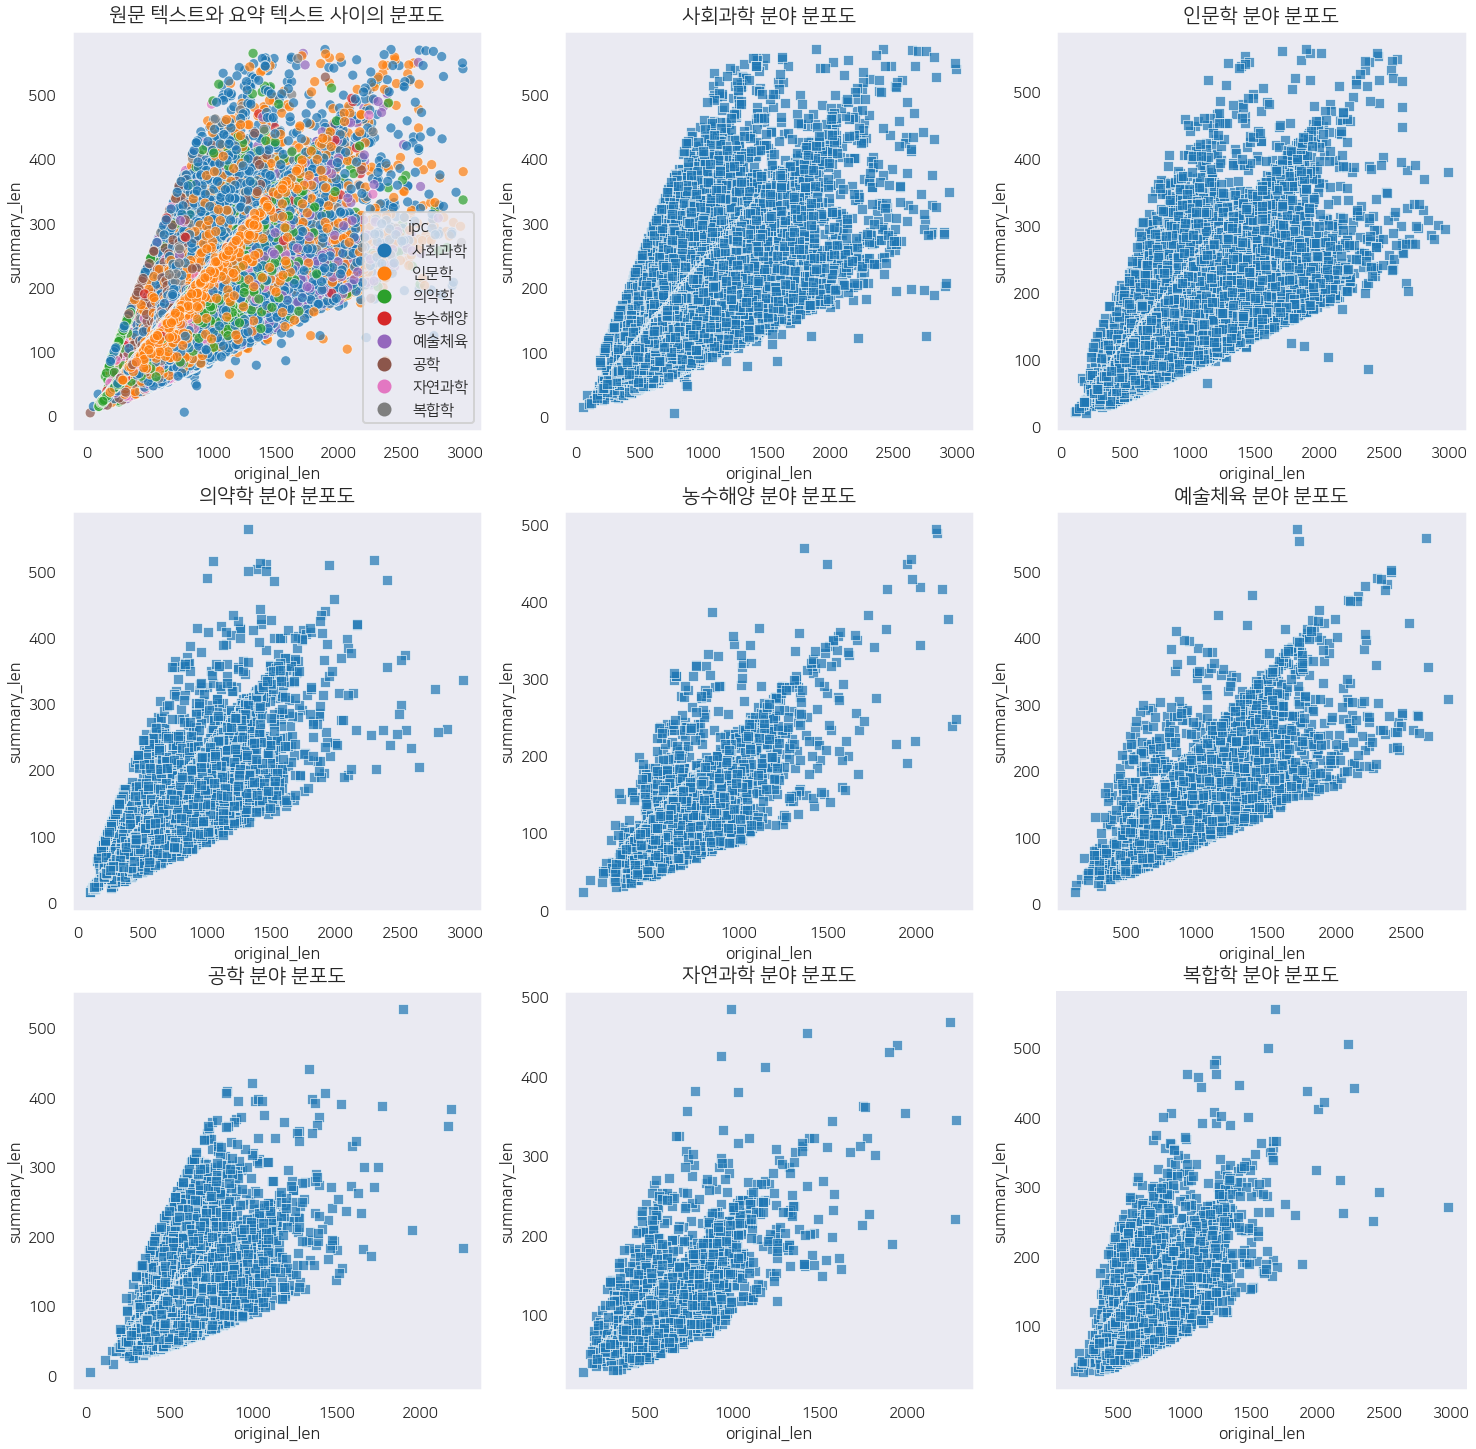

In [ ]:
sns.set_style('dark',{'font.family':'NanumSquare'})

fig20, axes = plt.subplots(3,3,figsize=(25,25))
fig20.gca().spines['right'].set_visible(False)   # 오른쪽 테두리 제거
fig20.gca().spines['top'].set_visible(False)     # 위 테두리 제거
fig20.gca().spines['left'].set_visible(False)    # 왼쪽 테두리 제거

ax20 = sns.scatterplot(x="original_len", y="summary_len", data=train_data, alpha=0.7, ax=axes[0,0], hue='ipc', s=100, marker='o')
ax20.set_title('원문 텍스트와 요약 텍스트 사이의 분포도', fontsize=60, fontproperties=fontprop, position=(0.5, 1.0+0.01))

ax21 = sns.scatterplot(x="original_len", y="summary_len", data=train_data[train_data.ipc=='사회과학'], ax=axes[0,1], alpha=0.7, s=100, marker='s')
ax21.set_title('사회과학 분야 분포도', fontsize=60, fontproperties=fontprop, position=(0.5, 1.0+0.01))

ax22 = sns.scatterplot(x="original_len", y="summary_len", data=train_data[train_data.ipc=='인문학'], alpha=0.7, ax=axes[0,2], s=100, marker='s')
ax22.set_title('인문학 분야 분포도', fontsize=60, fontproperties=fontprop, position=(0.5, 1.0+0.01))

ax23 = sns.scatterplot(x="original_len", y="summary_len", data=train_data[train_data.ipc=='의약학'], alpha=0.7, ax=axes[1,0], s=100, marker='s')
ax23.set_title('의약학 분야 분포도', fontsize=60, fontproperties=fontprop, position=(0.5, 1.0+0.01))

ax24 = sns.scatterplot(x="original_len", y="summary_len", data=train_data[train_data.ipc=='농수해양'], alpha=0.7, ax=axes[1,1], s=100, marker='s')
ax24.set_title('농수해양 분야 분포도', fontsize=60, fontproperties=fontprop, position=(0.5, 1.0+0.01))

ax25 = sns.scatterplot(x="original_len", y="summary_len", data=train_data[train_data.ipc=='예술체육'], alpha=0.7, ax=axes[1,2], s=100, marker='s')
ax25.set_title('예술체육 분야 분포도', fontsize=60, fontproperties=fontprop, position=(0.5, 1.0+0.01))

ax26 = sns.scatterplot(x="original_len", y="summary_len", data=train_data[train_data.ipc=='공학'], alpha=0.7, ax=axes[2,0], s=100, marker='s')
ax26.set_title('공학 분야 분포도', fontsize=60, fontproperties=fontprop, position=(0.5, 1.0+0.01))

ax27 = sns.scatterplot(x="original_len", y="summary_len", data=train_data[train_data.ipc=='자연과학'], alpha=0.7, ax=axes[2,1], s=100, marker='s')
ax27.set_title('자연과학 분야 분포도', fontsize=60, fontproperties=fontprop, position=(0.5, 1.0+0.01))

ax28 = sns.scatterplot(x="original_len", y="summary_len", data=train_data[train_data.ipc=='복합학'], alpha=0.7, ax=axes[2,2], s=100, marker='s')
ax28.set_title('복합학 분야 분포도', fontsize=60, fontproperties=fontprop, position=(0.5, 1.0+0.01))

정확한 양상을 알기 위해 회귀선을 추가해보겠습니다.

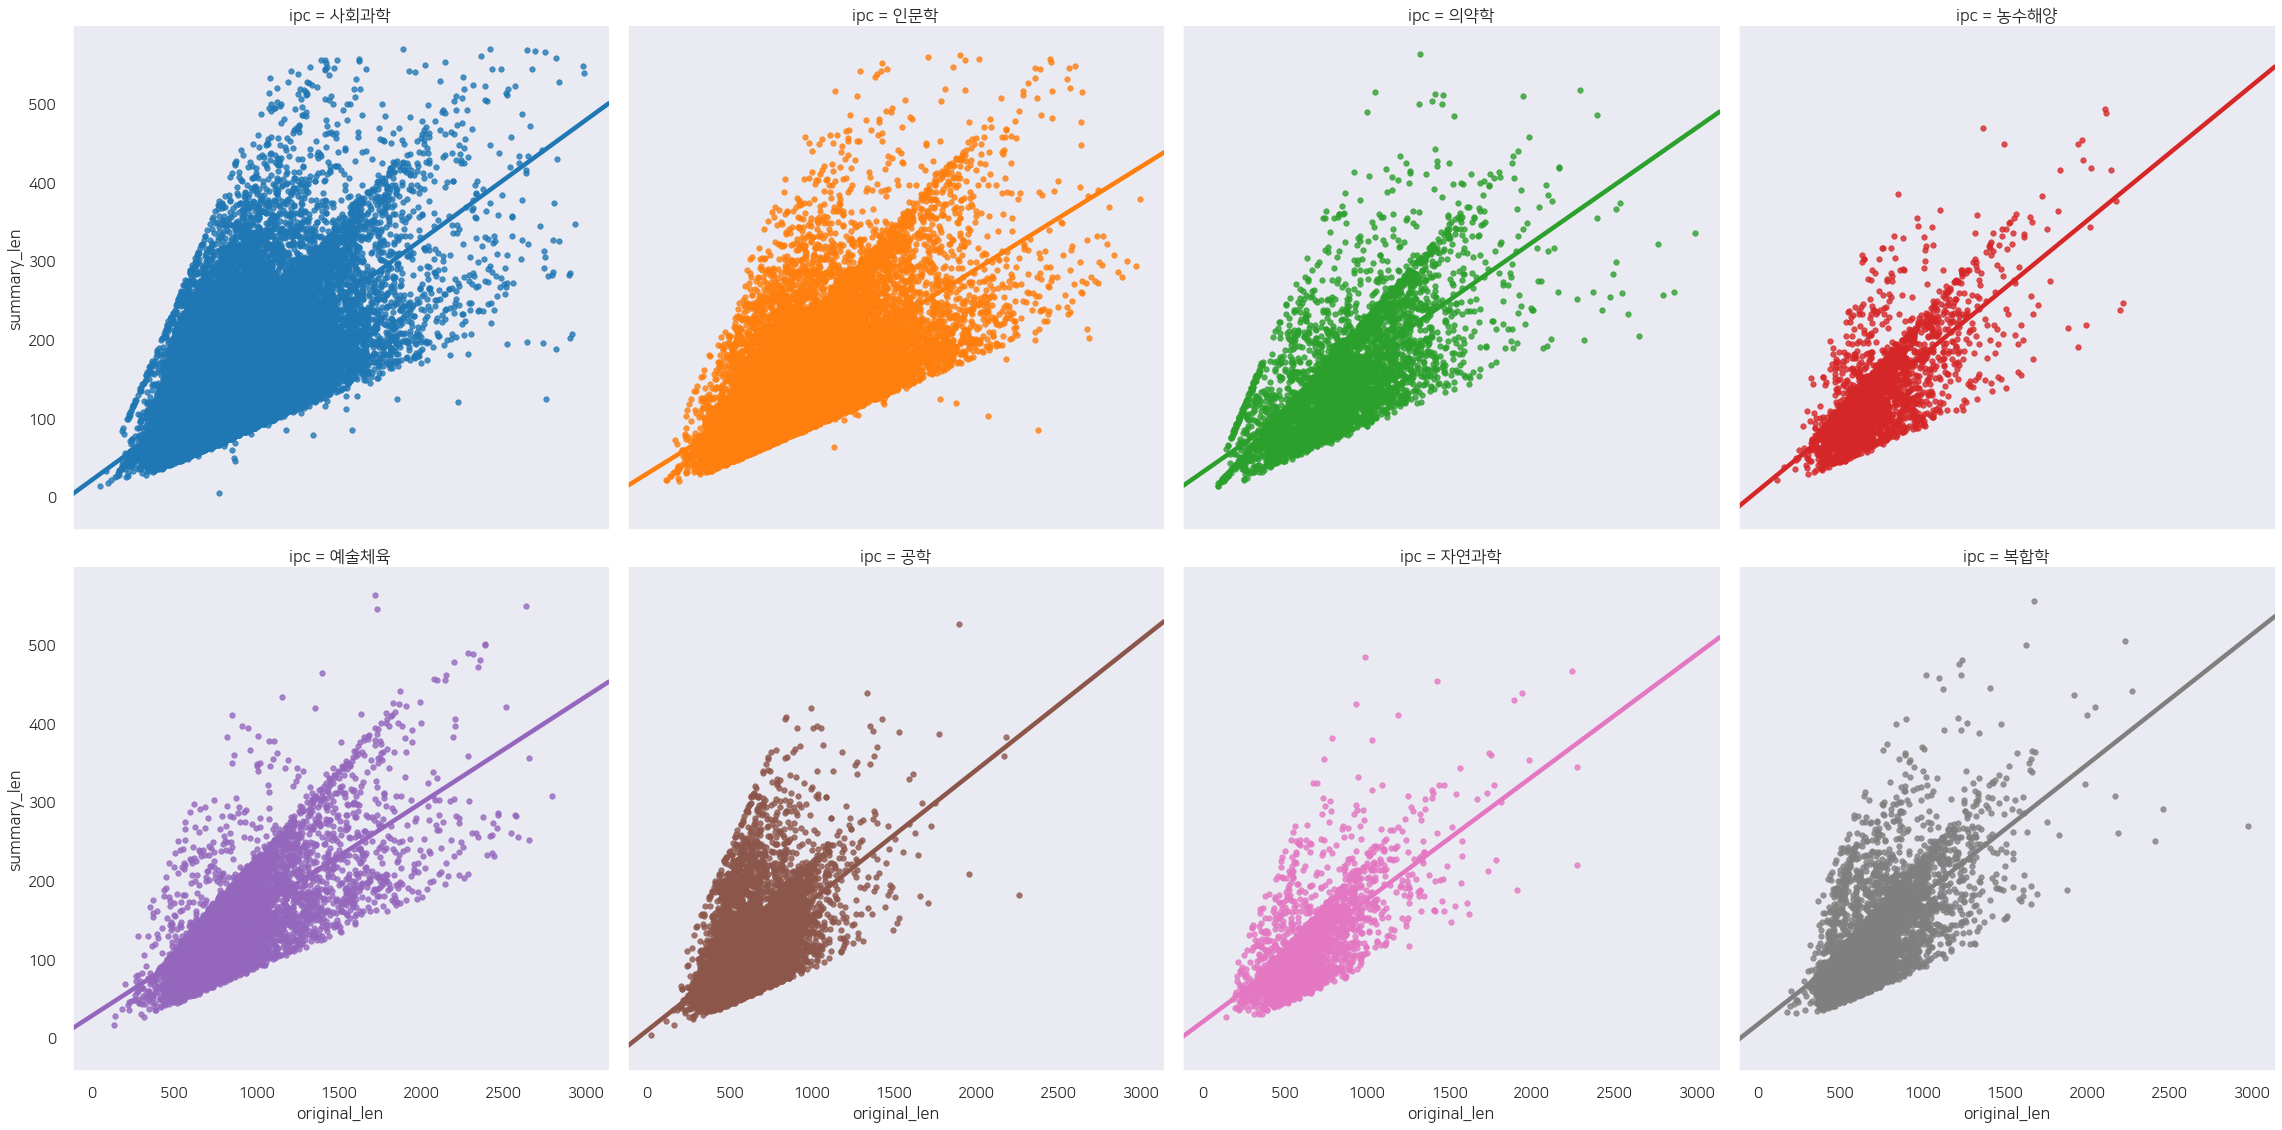

In [ ]:
sns.set_style('dark',{'font.family':'NanumSquare'})

ax29 = sns.lmplot(x="original_len", y="summary_len", data=train_data, hue='ipc',ci=None, truncate=False, col='ipc', height=8, col_wrap=4, # 한 줄에 4개씩 표시
                  scatter_kws=dict(s=30, linewidths=.7, edgecolors=None))

- 전체적으로 **양의 상관관계**를 보인다.
- 원문의 길이:

      - 원문의 길이가 3000까지 : 사회과학, 인문학, 의약학, 복합학
      - 원문의 길이가 2500까지 : 예술체육
      - 원문의 길이가 2000까지 : 농수해양, 공학, 자연과학

  분야(ipc)별로 원문의 길이 영역이 다르게 나타나나 요약문의 경우 500까지로 비교적 균일하게 나타남을 확인 할 수 있다.

  길이 3000 이상인 영역은 사회과학, 인문학, 의약학, 복합학으로 인문학적 사고와 다각적 사고가 필요한 분야들이라 볼 수 있다. 
  
  길이 2000까지 영역은 농수해양, 공학, 자연과학으로 인문학적 사고보단 핵심을 명료하게 짚어내는 양상을 보인다 말할 수 있겠다.

  예술체육의 경우 2500으로 중간에 위치한다.

    ---

- 분야별 특이사항 해석

  - 사회과학: 대부분 응집력있게 분포하지만 몇몇의 경우 원문의 길이와 요약문의 길이에 차이나는 양상을 보인다.
  - 인문학: 인문학 역시 사회과학과 유사하다.
  - 의약학: 특이사항 없음. 응집력 있다.
  - 농수해양: 대체적으로 응집력 있으나, 회귀선을 기준으로 치우친 형태
  - 예술체육: 응집력 있게 분포하는 것 같으나, 퍼진 부분이 있음
  - 공학: 균형감있고, 응집력 있으나 길이가 짧은 편
  - 자연과학: 공학과 유사하게 길이가 짧으나, 원문의 길이가 요약문 대비 길다. (치우침)
  - 복합학: 균형있고 응집력이 있는 편이다. 하지만 가득 차진 않았다. 


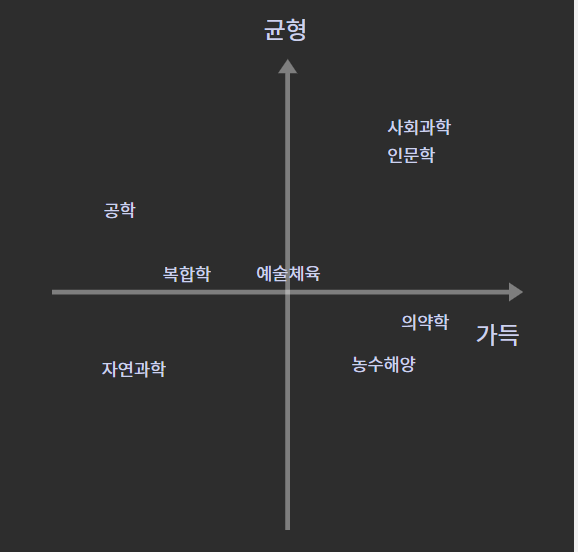

### 시각화를 위한 텍스트 데이터 전처리

### 단어 분포 시각화

**불용어 처리**

- 분석에 영향을 주지 않는 단어들은 굳이 분석하지 않아도 됩니다.

- 이를 위해 불용어를 저장하고 처리하는 텍스트 전처리 과정이 필요합니다.

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Stopwords를 위한 준비     ## 불용어 추가시 : stopwords.add('')
comment_words = ''
stopwords = set(STOPWORDS)
tokenized_text = []

기존의 stopwords는 영어 불용어입니다. 

한국어의 경우 따로 불용어 사전이 존재하지 않기 때문에 추가적으로 구성해주는 경우가 있습니다.

https://www.ranks.nl/stopwords/korean

위 링크를 참조하여 txt 파일에 불용어를 저장한 후 불러와 stopword 리스트(lines)를 형성합니다.

본 txt 파일은 단어가 행별로 구성되어 있습니다.

In [ ]:
stopword_txt = '/content/drive/MyDrive/NLP/stopword.txt'
with open(stopword_txt) as f:
    lines = f.readlines()

lines = [line.rstrip('\n') for line in lines] # 우측의 '\n'제거
print(lines)

['않다', '되어다', '되다', '하다', '어떻다', '이렇다', '이다', '어제', '매일', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에

In [ ]:
print(f'추가된 한국어 불용어 개수는 {len(lines)}입니다.')

추가된 한국어 불용어 개수는 684입니다.


In [ ]:
# 한국어 불용어 추가
stopwords.update(lines)

# 불용어 추가
stopwords.add('summary_text')
stopwords.add('논문에서는')

stopword_3 = ['등의','모든','이와 같은','이를','이는','논문은','연구에서는','차원에서','먼저','첫째','것으로','나타났다','있었다','아니라','있어서']
stopwords.update(stopword_3)

다음은 불용어를 제거한 후에 텍스트에서 빈번하게 쓰이는 단어들을 시각화한 것이다.

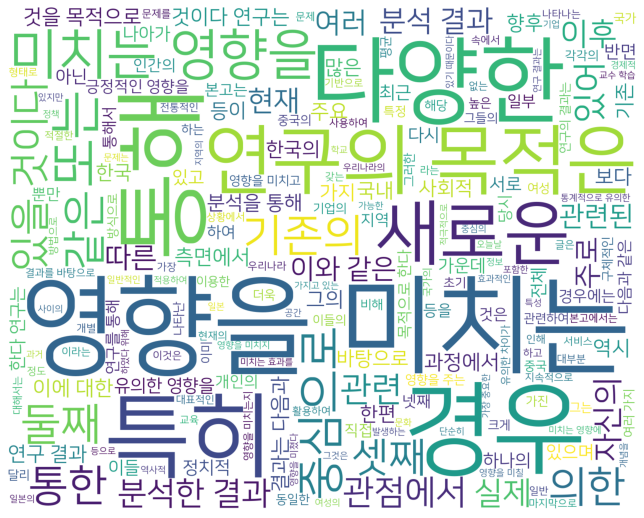

In [ ]:
for val in train_data['entire_original']:

  # 문장을 string 형식으로 변환
  val = str(val)

  # 문장 토큰화
  tokens = val.split()
  
  tokenized_text.append(tokens)           # 위에서 만들어 놓은 tokenized_text에 tokens 더함
  comment_words += " ".join(tokens)+" "   # 위에서 만들어놓은 comment_words ''에 토큰화한 tokens 결합

wordcloud = WordCloud(width=1500, height=1200,
                      font_path = font_path,    # NanumSquare
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size=10).generate(comment_words)

# plot WordCloud image
plt.figure(figsize=(10,7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

### 모델링을 위한 텍스트 전처리

In [ ]:
train_data = train_data[['entire_original','entire_summary']]

텍스트 전처리 함수를 형성합니다.

In [ ]:
# 텍스트 전처리 함수
def preprocessing_with_stopword(str):
  str = str.replace('summary_text','')
  str = str.replace('summary_text:', '')
  str = str.replace('\n','')
  str = str.replace('\\n','')
  
  specialChars = "!#$%^&*(){}:" 
  for specialChar in specialChars:
    str = str.replace(specialChar, '')
  return str

In [ ]:
train_data.apply(preprocessing_with_stopword)

,entire_original,entire_summary
0,몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상...,Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다...
1,본 연구는 지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접...,지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조사를 통해...
2,본 연구에서는 아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다. ...,아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다.\n집단간 가족특...
3,"현대사회는 자기애적 현상이 문화적 흐름으로 강하게 자리잡고 있고, 우리나라에도 이 ...","자기애적 성격성향과 청소년 비행성향 간의 관계를 알아보고, 청소년 비행성향에 영향을..."
4,"본 연구에서는 청소년들의 음란물 접촉은 날로 증가하지만, 이를 효과적으로 차단하기 ...",청소년들의 음란물 접촉은 날로 증가하지만 이를 효과적으로 차단하기 힘든 현 상황에서...
...,...,...
134066,일제 강점기 재만 조선인문학은 흔히 말하듯 절대다수가 건전한 작품으로 되여 있다. ...,일제강점기 재만 조선인문학 작품의 일부는 만주국정권에 영합하거나 일제의 대륙침략에 ...
134067,본고의 목적은 수능을 통해 국어교육을 되돌아보고 이를 발판으로 삼아 국어교육에 대해...,수능 평가 목표로 볼 때 국어교육의 과제는 범교과적 성격을 유지하고 내용 교과로서의...
134068,본 연구에서는 단위학교에서의 국어교육 정책 실행 양상을 살펴 그 이면에 놓인 철학을...,"단위학교의 정의적 영역 평가 실태를 분석한 결과, 정책 실행 과정에서 해당 정책의 ..."
134069,국어교육에서는 구조주의 의미론의 입장에서 의미는 고정되어 있고 핵심 개념이 존재한다...,국어교육의 구조주의 의미론과는 다르게 실제 언어생활에서 의미는 맥락과 상황이 작용하...


In [ ]:
train_data

,entire_original,entire_summary
0,몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상...,Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다...
1,본 연구는 지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접...,지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조사를 통해...
2,본 연구에서는 아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다. ...,아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다.\n집단간 가족특...
3,"현대사회는 자기애적 현상이 문화적 흐름으로 강하게 자리잡고 있고, 우리나라에도 이 ...","자기애적 성격성향과 청소년 비행성향 간의 관계를 알아보고, 청소년 비행성향에 영향을..."
4,"본 연구에서는 청소년들의 음란물 접촉은 날로 증가하지만, 이를 효과적으로 차단하기 ...",청소년들의 음란물 접촉은 날로 증가하지만 이를 효과적으로 차단하기 힘든 현 상황에서...
...,...,...
134066,일제 강점기 재만 조선인문학은 흔히 말하듯 절대다수가 건전한 작품으로 되여 있다. ...,일제강점기 재만 조선인문학 작품의 일부는 만주국정권에 영합하거나 일제의 대륙침략에 ...
134067,본고의 목적은 수능을 통해 국어교육을 되돌아보고 이를 발판으로 삼아 국어교육에 대해...,수능 평가 목표로 볼 때 국어교육의 과제는 범교과적 성격을 유지하고 내용 교과로서의...
134068,본 연구에서는 단위학교에서의 국어교육 정책 실행 양상을 살펴 그 이면에 놓인 철학을...,"단위학교의 정의적 영역 평가 실태를 분석한 결과, 정책 실행 과정에서 해당 정책의 ..."
134069,국어교육에서는 구조주의 의미론의 입장에서 의미는 고정되어 있고 핵심 개념이 존재한다...,국어교육의 구조주의 의미론과는 다르게 실제 언어생활에서 의미는 맥락과 상황이 작용하...


In [ ]:
text_len = [len(t.split()) for t in train_data['entire_original']]
summ_len = [len(t.split()) for t in train_data['entire_summary']]

[Text(0, 0.5, '')]

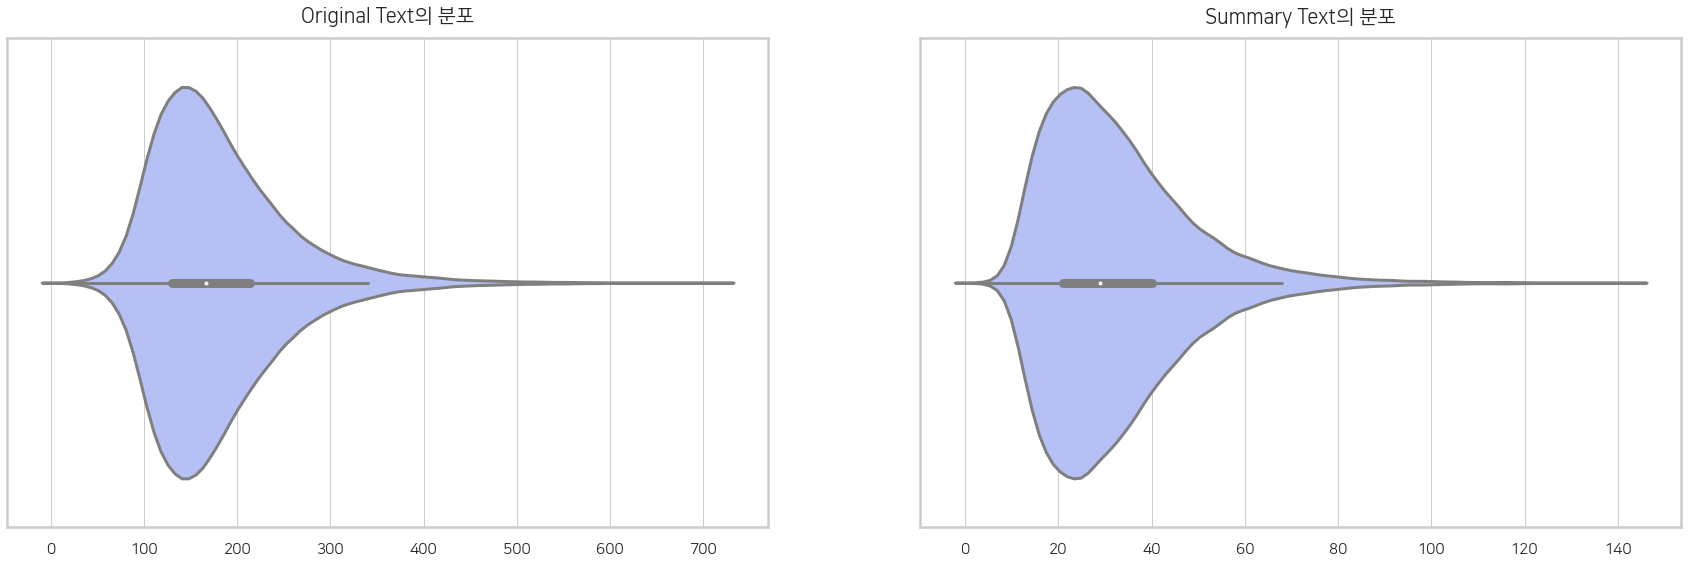

In [ ]:
sns.set_style('whitegrid',{'font.family':'NanumSquare'})
sns.set_context(rc={"grid.linewidth": 1})

fig19, axes = plt.subplots(1,2,figsize=(30,9))

ax19 = sns.violinplot(text_len,color='#AAB9FF',ax=axes[0]) # 세로 방향으로 생성
ax19.set_title('Original Text의 분포', fontsize=100, fontproperties=fontprop, position=(0.5, 1.0+0.02))
ax19.set(xlabel=None)
ax9.set(ylabel=None)

ax19 = sns.violinplot(summ_len, color='#AAB9FF',ax=axes[1])
ax19.set_title('Summary Text의 분포', fontsize=100, fontproperties=fontprop, position=(0.5, 1+0.02))
ax19.set(xlabel=None)
ax19.set(ylabel=None)

분포를 확인할 때 히스토그램을 많이 활용하지만, 히스토그램의 bin size에 따라 상이한 결과를 얻는다.

그 대안으로 커널 밀도 추정(KDE)가 많이 사용되는데, 분포를 부드럽게 시각화하여 보여주는 것이다.

violinplot 안에는 KDE가 포함되어있어 그 분포를 알 수 있다.

In [ ]:
print('텍스트 최소 길이: {}'.format(np.min(text_len)))
print('텍스트 최대 길이: {}'.format(np.max(text_len)))
print('텍스트 평균 길이: {}'.format(round(np.mean(text_len),2)))
print('-'*30)
print('요약   최소 길이: {}'.format(np.min(summ_len)))
print('요약   최대 길이: {}'.format(np.max(summ_len)))
print('요약   평균 길이: {}'.format(round(np.mean(summ_len),2)))

텍스트 최소 길이: 5
텍스트 최대 길이: 718
텍스트 평균 길이: 179.8
------------------------------
요약   최소 길이: 1
요약   최대 길이: 143
요약   평균 길이: 32.27


원문 텍스트의 길이는 대체적으로 1500 이하의 길이를 가졌습니다. 또, 평균의 길이는 179.8입니다.

요약의 경우 대체적으로 400 이하의 길이를 가졌고, 평균 길이는 32.27입니다.

평균 길이보다는 크게 잡아 800, 150으로 정하겠습니다.

In [ ]:
text_max_len = 800
summary_max_len = 150

## 모델링 준비 (Seq2Seq+ attention)

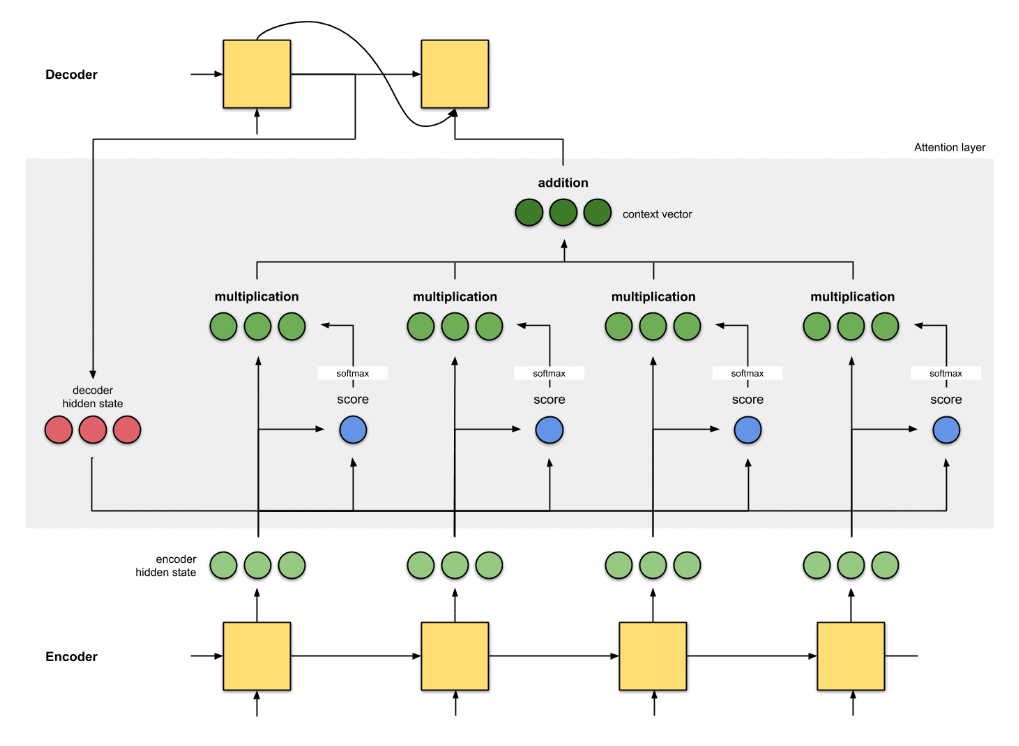

자료 출처: https://towardsdatascience.com/attn-illustrated-attention-5ec4ad276ee3

### Seq2Seq 설명

RNN은 바로 직전의 데이터셋만 기억하기 때문에 전체 입력 문장을 고려하지 못합니다.

Seq2Seq는 2개의 RNN으로 구성된 모델인데, 각각이 Encoder와 Decoder로 불리기 때문에 Encoder Decoder Model이라 불립니다.

Encoder는 입력 문장의 단어들을 읽어 단일 벡터라 불리는 context vector를 출력하고, 

Decoder는 context vector를 받아 출력 시퀀스를 생성합니다.

[Visualizing A Neural Machine Translation Model (Mechanics of Seq2seq Models With Attention) 참조](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)

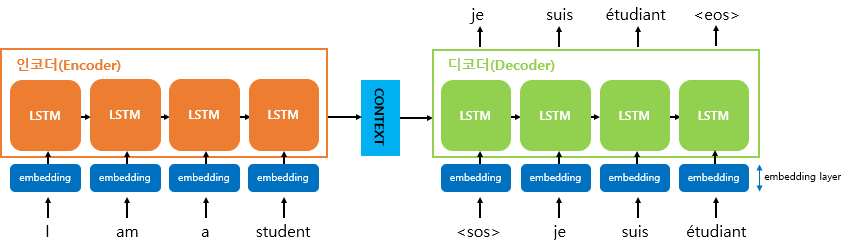

(자료 출처: wikidocs, 시퀀스 투 시퀀스 https://wikidocs.net/24996 )

한계 : 1. 하나의 고정된 벡터에 모든 정보를 입력해 정보손실이 발생될 수 있다.

한계 : 2. 기울기 소실 문제 (Vanishing Gradient)

### attention 설명

한계를 극복하기 위해 집중하여 Decoder에 바로 전달하는 Attention 기법이 생겨났다.

디코더에서 출력 단어를 예측하는 매 시점마다 인코더에서의 전체 입력 문장을 다시 한 번 참조한다는 개념이다.

예측해야 하는 각 부분과 연관된 부분에 더 집중해서 참조한다. 

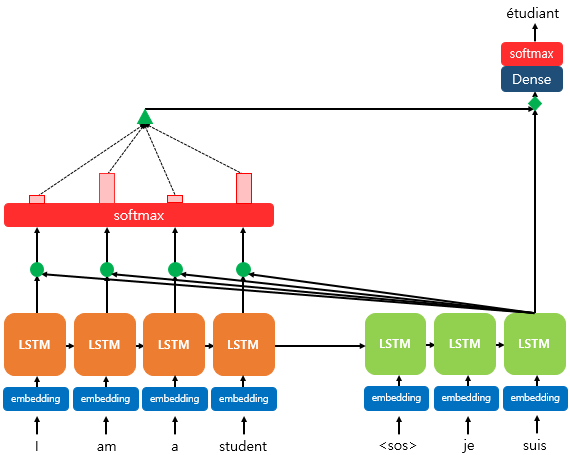

[어텐션 메커니즘, 위키독스 참조](https://wikidocs.net/22893)

----

Attention timestep 관련 자료 영상:

https://jalammar.github.io/images/attention_process.mp4

(출처: https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)

**인코더 내부**

인코더 내부에서 입력 문장은 단어 토큰화를 통해 쪼개지고, 단어 토큰은 RNN셀의 각 시점의 입력이 된다.

모든 단어를 입력 받고 RNN셀의 마지막 은닉 상태를 디코더 RNN셀로 넘긴다 (Context Vector).

**디코더 내부**

디코더에는 초기 입력으로 문장의 시작을 의미하는 ```<sos>```가 들어간다.

다음에 올 단어들을 거듭 예측하고, 문장의 끝을 의미하는 심볼인 ```<eos>```가 등장할 때까지 반복된다.

### Seq2Seq 훈련 위한 토큰 추가

In [ ]:
train_data['decoder_input']= train_data['entire_summary'].apply(lambda x: '<SOS>'+x)
train_data['decoder_target']=train_data['entire_summary'].apply(lambda x: x+'<EOS>')
train_data.head()

,entire_original,entire_summary,decoder_input,decoder_target
0,몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상...,Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다...,<SOS>Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하...,Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다...
1,본 연구는 지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접...,지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조사를 통해...,<SOS>지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조...,지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조사를 통해...
2,본 연구에서는 아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다. ...,아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다.\n집단간 가족특...,<SOS>아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다.\n집단...,아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다.\n집단간 가족특...
3,"현대사회는 자기애적 현상이 문화적 흐름으로 강하게 자리잡고 있고, 우리나라에도 이 ...","자기애적 성격성향과 청소년 비행성향 간의 관계를 알아보고, 청소년 비행성향에 영향을...","<SOS>자기애적 성격성향과 청소년 비행성향 간의 관계를 알아보고, 청소년 비행성향...","자기애적 성격성향과 청소년 비행성향 간의 관계를 알아보고, 청소년 비행성향에 영향을..."
4,"본 연구에서는 청소년들의 음란물 접촉은 날로 증가하지만, 이를 효과적으로 차단하기 ...",청소년들의 음란물 접촉은 날로 증가하지만 이를 효과적으로 차단하기 힘든 현 상황에서...,<SOS>청소년들의 음란물 접촉은 날로 증가하지만 이를 효과적으로 차단하기 힘든 현...,청소년들의 음란물 접촉은 날로 증가하지만 이를 효과적으로 차단하기 힘든 현 상황에서...


**인코더, 디코더의 입력과 라벨 저장**

attention 모델이 초기 문장을 다시 참고한다는 점에서 인코더 입력, 디코더 입력, 라벨을 저장해줄 필요가 있다.

In [ ]:
encoder_input = np.array(train_data['entire_original'])   # 인코더 입력 저장
decoder_input = np.array(train_data['decoder_input'])     # 디코더 입력 저장
decoder_target = np.array(train_data['decoder_target'])   # 라벨 저장

In [ ]:
print(f'인코더 입력 shape: {encoder_input.shape}')
print(f'디코더 입력 shape: {decoder_input.shape}')
print(f'디코더 타겟 라벨 : {decoder_target.shape}')

인코더 입력 shape: (91897,)
디코더 입력 shape: (91897,)
디코더 타겟 라벨 : (91897,)


### **데이터셋 분리**

데이터셋 분리에 보통 sklearn에서 제공하는 train_test_split()을 이용해 분리해주는 방식을 사용한다.

데이터를 random shuffle을 이용해 순서가 섞인 정수 시퀀스를 만들어주고 이를 이용해 데이터를 분리해주는 방식이 있어 사용해보도록 하겠다.

In [ ]:
###### 추후 train_test_split()과 비교해봐도 좋을 것 같다.

In [ ]:
indices = np.arange(encoder_input.shape[0])   # 인코더의 shape[0]만큼 ndarray배열 객체를 반환한다.
np.random.shuffle(indices)                    # 랜덤으로 셔플
print(indices)

[25210 64071 31712 ... 64222 41276 28102]


**데이터셋 분리** (훈련 8: 테스트 2)

보통 훈련과 테스트셋을 8:2의 비율로 나눈다고 한다.

In [ ]:
n_of_val = int(len(encoder_input)*0.2)
print(f'테스트셋의 데이터 수는 {n_of_val}개 입니다.')

테스트셋의 데이터 수는 18379개 입니다.


앞에서 저장한 encoder_input, decoder_input, decoder target을 활용하여 데이터셋을 분리한다.

In [ ]:
# train 데이터셋
encoder_input_train = encoder_input[:-n_of_val] # 인코더 입력 끝에서 20%를 제외하고 인코더 입력 훈련 데이터셋
decoder_input_train = decoder_input[:-n_of_val] # 디코더 입력 끝에서 20%를 제외하고 디코더 입력 훈련 데이터셋
decoder_target_train = decoder_target[:-n_of_val]

# test 데이터셋
encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('Train 데이터 개수: ',len(encoder_input_train))
print('Test  데이터 개수: ',len(encoder_input_test))

print('Train label 개수: ',len(decoder_input_train))
print('Test  label 개수: ',len(decoder_input_test))

Train 데이터 개수:  73518
Test  데이터 개수:  18379
Train label 개수:  73518
Test  label 개수:  18379


In [ ]:
encoder_input_train

array(['몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상에 대한 연구로부터 시작되었지만, 현재는 청소년발달이나 스포츠 심리학, 심지어 심리치료분야에까지 널리 영향을 미치고 있다. 본 연구의 목적은 Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다. 본 연구에서 제시하는 진로상담 모형은 몰입이론에서 주장하듯이 개인이 일에서 추구하고자 하는 즐거움과 유능함을 동시에 얻는 것이 가능하다는 전제에서 출발한다. 따라서 기본적으로 내담자가 흥미와 능력이 균형을 이룬 상태인 몰입을 특정한 영역에서 경험하고 그러한 일에서의 경험이 자신의 진로발달 및 진로결정과도 연결될 수 있도록 돕는 것이 진로상담자의 역할이라고 본다. 본 연구의 전반부에서는 몰입이론에 근거한 진로상담이 기존의 진로상담과 구별되는 점을 다음과 같이 기술하였다. 첫째, 본 진로상담 모형에서는 일이 적응의 대상이 아니라 우리 삶에 즐거움을 주는 원천으로 보고 있다. 둘째, 진로상담의 목표는 적응을 넘어 재능의 발달로 확장된다. 셋째, 진로문제는 진로의식의 미성숙과 같은 ‘의식’의 문제가 아니라 ‘일상생활에서 몰입경험의 부재’나 ‘삶의 의미로 통합되지 못한 몰입경험’으로 본다. 따라서 ‘일상생활에서 실제적인 몰입경험’의 중요성을 강조한다. 끝으로 진로상담이 진로선택을 돕는 것을 넘어서 아직 선택의 기점에 놓이지 않은 내담자들에게도 몰입을 경험하게 하고 그것이 생의 의미와 통합될 수 있도록 돕는 것이 진로상담의 주요 기능으로 보고 있다. 본 연구의 후반부에는 몰입이론을 진로상담에 적용했을 때 진로문제의 유형을 4개로 구분하여 제시했으며, 그 후 이 모형을 사용할 때의 실제 사례를 소개하였다., summary_text: Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다. 전반부에서는 몰입이론에 근거한 진로상담이 기존의 진로상담과 구별되는 점을 다음과 같이 기술하였고 후반부에는 몰입이론을 진로상담에 적용했을 때

### 단어 토큰화 및 정수 인코딩

Tensorflow(Keras)에서 제공하는 전처리 모듈을 사용합니다.

tokenizer를 불러와 fit_on_texts() 모듈을 통해 문자 데이터를 입력 받아 리스트 형태로 변환합니다. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer= Tokenizer()
tokenizer.fit_on_texts(encoder_input_train)

- 단어 집합이 형성되었고
- 각 단어에 고유한 정수가 부여되어 word_index에 저장됩니다.
- 토크나이저의 word_index 속성은 단어와 숫자의 키-쌍을 포함하는 딕셔너리를 반환합니다.
- 느낌표, 마침표 같은 구두점도 자동 제거됩니다.

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어들의 수
rare_cnt = 0      # 등장 빈도가 threshold 보다 작은 단어 개수를 셀 것 입니다.
total_freq = 0    # 훈련 데이터 전체 단어 빈도수 총 합
rare_freq = 0     # 등장 빈도수 threshold보다 작은 단어의 등장 빈도 수 총 합

# 단어와 빈도수의 쌍을 key, value로 받아오겠습니다.
for key,value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  if (threshold> value):            # value가 threshold보다 작을 때
    rare_cnt += 1                   # rare_cnt에 1을 더하고
    rare_freq = rare_freq + value   # 등장 빈도가 threshold보다 작은 단어들의 빈도수 구하기

print('단어 집합의 크기                             :',total_cnt)
print('등장 빈도 %s번 이하인 빈도가 적은 단어 수     : %s'%(threshold-1, rare_cnt))
print('빈도가 적을 단어를 제외할 경우 단어 집합 크기: %s'%(total_cnt - rare_cnt))
print('-'*60)
print('단어 집합 중 빈도 적은 단어의 비율           :', round(((rare_cnt / total_cnt)*100),2),'%')
print('전체 등장 빈도 대비 적은 빈도 단어 등장 비율 :', round(((rare_freq/total_freq)*100),2),'%')

단어 집합의 크기                             : 1360072
등장 빈도 2번 이하인 빈도가 적은 단어 수     : 1004607
빈도가 적을 단어를 제외할 경우 단어 집합 크기: 355465
------------------------------------------------------------
단어 집합 중 빈도 적은 단어의 비율           : 73.86 %
전체 등장 빈도 대비 적은 빈도 단어 등장 비율 : 9.44 %


threshold를 3으로 잡아 적은 빈도 수를 1, 2번 등장하는 단어로 지정했습니다.

적은 빈도의 단어는 단어 집합 중 73.86%를 차지합니다. 

실제로 훈련 데이터에서 적은 빈도 단어가 차지하는 비율은 9.44%입니다.

등장 빈도가 2회 이하인 단어들은 정수 인코딩 과정에서 배제시키겠습니다. 

적은 빈도를 제외하면 단어집합의 크기는 355465가 됩니다. 

- 단어 집합의 크기를 줄이고
- 빈도가 적은 단어를 제외하여 훈련이 잘 되도록 하기 위함

In [ ]:
vocab_size = 355465
tokenizer = Tokenizer(num_words= vocab_size)
tokenizer.fit_on_texts(encoder_input_train)

# 텍스트 시퀀스 --> 정수 시퀀스로 인코딩
encoder_input_train = tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = tokenizer.texts_to_sequences(encoder_input_test)

In [ ]:
print(encoder_input_train[:2])

[[261086, 4821, 13446, 405, 33, 1826, 151, 4762, 45260, 58, 1367, 2278, 3, 29625, 38626, 5715, 1316, 12351, 5480, 996, 14, 639, 2, 4, 29, 72, 146432, 128437, 512, 71274, 355, 461, 16, 4, 242, 461, 17186, 3419, 57615, 2931, 45261, 14878, 33, 19341, 166, 4002, 47, 4348, 13933, 5087, 50, 1560, 15640, 6626, 1957, 3323, 5481, 20969, 11531, 1621, 810, 3033, 406, 170848, 713, 151, 33085, 5, 11358, 1, 170, 3442, 47, 75887, 483, 4, 29, 60423, 205429, 1258, 170849, 136, 146433, 3823, 245, 94, 230, 4613, 65, 4, 17186, 17187, 2709, 14879, 904, 52, 243, 1565, 7519, 270, 15478, 527, 2, 64, 71274, 2580, 6318, 1193, 67143, 4111, 24975, 102, 261087, 261088, 170850, 43, 320, 52, 128438, 14463, 2550, 57616, 531, 483, 50, 128438, 2555, 845, 2651, 1680, 170849, 95031, 3442, 39, 3195, 818, 5358, 146434, 128439, 165, 11531, 5519, 133, 758, 15479, 744, 37563, 1, 170, 3442, 47, 71274, 112, 12251, 527, 2, 4, 29, 103893, 128437, 81282, 17188, 58, 752, 33856, 681, 43723, 10, 61, 6, 355, 1246, 2924, 202, 374, 5175

**Label 데이터( 요약 데이터에 대해 수행)**

In [ ]:
target_tokenizer = Tokenizer()
target_tokenizer.fit_on_texts(decoder_input_train)

요약데이터에 대해서도 단어 집합으로 token화를 진행하고 고유한 정수를 부여되어 word_index에 저장되었습니다.

In [ ]:
threshold=3
total_cnt= len(target_tokenizer.word_index) # 단어들의 수
rare_cnt = 0  # threshold보다 적은 단어 개수 카운트
total_freq=0  # 훈련 데이터 전체 단어 빈도수 합
rare_freq =0  # threshold보다 적은 단어 등장 빈도 수 합 

# 단어와 빈도수의 쌍을 key, value로 받아옵니다.
for key, value in target_tokenizer.word_counts.items():
  total_freq += value

  # 단어 빈도수가 threshold보다 작을 때
  if ( threshold> value ):
    rare_cnt += 1           # rare_cnt에 1을 더함
    rare_freq += value      # rare_freq에 1을 더함

print('단어 집합의 크기                             :',total_cnt)
print('등장 빈도 %s번 이하인 빈도가 적은 단어 수     : %s'%(threshold-1, rare_cnt))
print('빈도가 적을 단어를 제외할 경우 단어 집합 크기: %s'%(total_cnt - rare_cnt))
print('-'*60)
print('단어 집합 중 빈도 적은 단어의 비율           :', round(((rare_cnt / total_cnt)*100),2),'%')
print('전체 등장 빈도 대비 적은 빈도 단어 등장 비율 :', round(((rare_freq/total_freq)*100),2),'%')

단어 집합의 크기                             : 447286
등장 빈도 2번 이하인 빈도가 적은 단어 수     : 366831
빈도가 적을 단어를 제외할 경우 단어 집합 크기: 80455
------------------------------------------------------------
단어 집합 중 빈도 적은 단어의 비율           : 82.01 %
전체 등장 빈도 대비 적은 빈도 단어 등장 비율 : 17.31 %


In [ ]:
threshold=2
total_cnt= len(target_tokenizer.word_index) # 단어들의 수
rare_cnt = 0  # threshold보다 적은 단어 개수 카운트
total_freq=0  # 훈련 데이터 전체 단어 빈도수 합
rare_freq =0  # threshold보다 적은 단어 등장 빈도 수 합 

# 단어와 빈도수의 쌍을 key, value로 받아옵니다.
for key, value in target_tokenizer.word_counts.items():
  total_freq += value

  # 단어 빈도수가 threshold보다 작을 때
  if ( threshold> value ):
    rare_cnt += 1           # rare_cnt에 1을 더함
    rare_freq += value      # rare_freq에 1을 더함

print('단어 집합의 크기                             :',total_cnt)
print('등장 빈도 %s번 이하인 빈도가 적은 단어 수     : %s'%(threshold-1, rare_cnt))
print('빈도가 적을 단어를 제외할 경우 단어 집합 크기: %s'%(total_cnt - rare_cnt))
print('-'*60)
print('단어 집합 중 빈도 적은 단어의 비율           :', round(((rare_cnt / total_cnt)*100),2),'%')
print('전체 등장 빈도 대비 적은 빈도 단어 등장 비율 :', round(((rare_freq/total_freq)*100),2),'%')

단어 집합의 크기                             : 447286
등장 빈도 1번 이하인 빈도가 적은 단어 수     : 310846
빈도가 적을 단어를 제외할 경우 단어 집합 크기: 136440
------------------------------------------------------------
단어 집합 중 빈도 적은 단어의 비율           : 69.5 %
전체 등장 빈도 대비 적은 빈도 단어 등장 비율 : 12.73 %


threshold를 2로 설정하였습니다.

threshold를 3으로 설정할 경우 단어 집합 중 빈도가 적은 단어의 비율이 82%를 상회하고, 

전체 등장 빈도 대비 적은 빈도 단어의 등장 비율이 17.31%로 나타났습니다. 

threshold =2 일 경우 단어 집합 중 빈도가 적은 단어는 69.5%를 차지하고, 전체 빈도 대비 빈도 적은 단어의 비율은 12.73%로 나타납니다.

이 단어들은 정수 인코딩 과정에서 배제하겠습니다.

In [ ]:
target_vocab_size = 136440
target_tokenizer = Tokenizer(num_words= target_vocab_size)
target_tokenizer.fit_on_texts(decoder_input_train)
target_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스 --> 정수 시퀀스
decoder_input_train = target_tokenizer.texts_to_sequences(decoder_input_train)
decoder_target_train = target_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = target_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = target_tokenizer.texts_to_sequences(decoder_target_test)

In [ ]:
print(decoder_target_train[:2])

[[57915, 45808, 412, 57916, 232, 258, 20, 57917, 80457, 1228, 133, 80458, 3923, 309, 299, 384, 38118, 45808, 80459, 11843, 80, 475, 45809, 820, 32789, 11, 59, 3, 232, 1238, 2806, 186, 233, 7054, 60, 1], [1848, 593, 1003, 2932, 21317, 14, 1848, 593, 80460, 186, 725, 21318, 45810, 6088, 13, 2505, 649, 8024, 32, 1848, 593, 80460, 186, 1116, 725, 692, 436, 57918, 626, 1639, 32790, 1422, 45810, 232, 13, 477, 761, 15, 1]]


**빈 샘플 제거**

threshold를 설정해 빈도수가 낮은 단어들을 지저아고 제거하였습니다.

이 과정에서 빈 샘플이 발생되었을 것입니다. 따라서 빈 샘플을 제거하도록 하겠습니다.

```<SOS>``` ```<EOS>``` 토큰만 남았을 것으로 길이가 0인 요약문의 길이는 1이됩니다.



In [ ]:
drop_train = [index for index, sen in enumerate(decoder_input_train) if len(sen)==1]
drop_test = [index for index, sen in enumerate(decoder_input_test) if len(sen)==1]

print(f'삭제될 훈련 데이터의 개수는 {len(drop_train)}개 입니다.')
print(f'삭제될 테스트 데이터의 개수는 {len(drop_test)}개 입니다.')

삭제될 훈련 데이터의 개수는 2개 입니다.
삭제될 테스트 데이터의 개수는 1개 입니다.


In [ ]:
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)    # encoder_input_train에서 drop_train을 delete합니다.
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)    # decoder_input_train에서 drop_train을 delete합니다.
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)  # decoder_target_train에서 drop_train을 delete합니다.

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)       # encoder_input_test에서 drop_test를 delete합니다.
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)       # decoder_input_test에서 drop_test를 delete합니다.
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)     # decoder_target_test에서 drop_test를 delete합니다.

print(f'훈련 데이터의 개수는 {len(encoder_input_train)}개 입니다.')
print(f'훈련 레이블의 개수는 {len(decoder_input_train)}개 입니다.')
print(f'테스트 데이터의 개수는 {len(encoder_input_test)}개 입니다.')
print(f'테스트 레이블의 개수는 {len(decoder_input_test)}개 입니다.')

훈련 데이터의 개수는 73516개 입니다.
훈련 레이블의 개수는 73516개 입니다.
테스트 데이터의 개수는 18378개 입니다.
테스트 레이블의 개수는 18378개 입니다.


**패딩 작업**

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post') # 뒤에 패딩 수행
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')

decoder_input_train = pad_sequences(decoder_input_train, maxlen= summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test= pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

## 모델 설계

### 인코더, 디코더 설계

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

**인코더 설계: LSTM 3개**

In [ ]:
embedding_dim =128
hidden_size=256

# 인코더 
encoder_inputs= Input(shape=(text_max_len,))

# 인코더 embedding층
'''단어 크기를 embedding_dim크기의 vector로 embedding'''
enc_emb = Embedding(vocab_size,embedding_dim)(encoder_inputs) # embedding층 만들고 encoder_inputs에 연결

# 인코더 LSTM 1층
'''
return_state=True를 하는 이유는 최근의 states를 더해주기 위함 Hidden state와 Cell state를 출력해주기 위한 옵션이라고 볼 수 있다.
Attention mechanism을 사용할 때 key와 value는 Encoder에서 나오는 Hidden state 부분을 사용했어야 하는데, 모든 Hidden State를 사용하기 위해 return_sequence=True로 해야한다.'''
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)  # encoder_lstm1 enc_emb층에 연결  # output1, state_h1, state_c1 생성

# 인코더 LSTM 2층
'''attention mechanism 적용 위해 encoder_output층 중요한듯'''
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)  # encoder_lstm2 encoder_output1에 연결  # output2, state_h2, state_c2 생성

# 인코더 LSTM 3층
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)  # encoder_lstm3 encoder_output2에 연결  # outputs, state_h, state_c 생성

**디코더 설계**

In [ ]:
# 디코더
decoder_inputs= Input(shape=(None,))

# 디코더 embedding층
dec_emb_layer = Embedding(target_vocab_size, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)

decoder_outputs, h, c = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# attention층 # LSTM 출력에다가 Attention value를 dense에 넘겨주는 것이 Attention mechanism
attention_layer = tf.keras.layers.Attention()

# 디코더 출력층
decoder_softmax_layer = Dense(target_vocab_size, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)

In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs, name='seq2seq+attention')
model.summary()

Model: "seq2seq+attention"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 800)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 800, 128)     45499520    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 800, 256),   394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                  

In [ ]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy')

In [ ]:
cb = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history = model.fit(x=[encoder_input_test, decoder_input_train], y=decoder_target_train,
                    validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
                    batch_size=256, callbacks=[cb], epochs=50)

ValueError: ignored